In [1]:
import sympy as smp

## Dynamical Variables
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
theta = smp.symbols('theta', real = True) ## theta is the angle between r1 and r2 vector.

## To get theta (or more specifically, cos(theta))
x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'y1')(r1, theta1, phi1)
y2 = smp.Function(r'y2')(r2, theta2, phi2)

z1 = smp.Function(r'z1')(r1, theta1)
z2 = smp.Function(r'z2')(r2, theta2)

## Wavefunction and Potential V
Psi = smp.Function('Psi')(r1, theta1, phi1, r2, theta2, phi2)
V = smp.Function('V')(r1, theta1, phi1, r2, theta2, phi2)

In [2]:
## To define Hamiltonian operator

absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))  ## |r1 - r1|
V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)  ## V = -2/r1 -2/r2 + 1/|r1-r2|

Laplacian = - 1/2 * (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) - 1/2 * (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) - 1/2 * (1/(r1**2 * smp.sin(theta1))) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) - 1/2 * (1/(r2**2 * smp.sin(theta2))) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) - 1/2 * (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) - 1/2 * (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

Hamiltonian = V_eff*Psi + Laplacian

Hamiltonian

(1/sqrt(r1**2 - 2*r1*r2*cos(theta) + r2**2) - 2/r2 - 2/r1)*Psi(r1, theta1, phi1, r2, theta2, phi2) - 0.5*(r2**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r2, 2)) + 2*r2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r2))/r2**2 - 0.5*(sin(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (theta2, 2)) + cos(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), theta2))/(r2**2*sin(theta2)) - 0.5*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (phi2, 2))/(r2**2*sin(theta2)**2) - 0.5*(r1**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r1, 2)) + 2*r1*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r1))/r1**2 - 0.5*(sin(theta1)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (theta1, 2)) + cos(theta1)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), theta1))/(r1**2*sin(theta1)) - 0.5*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (phi1, 2))/(r1**2*sin(theta1)**2)

In [3]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

# r1 and r2 vector in cartesian coordinates
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

# Compute the magnitude of r1 and r2
magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [4]:
cos_theta = cos_theta.simplify()  ## Cos(theta) in terms of theta1,theta2,phi and phi2 (r1*r2 cancels out)
sin_theta = sin_theta.simplify()  ## Sin(theta) in terms of theta1,theta2,phi and phi2 (r1*r2 cancels out)

In [5]:
## Defining 7 basis functions

Phi_1 = smp.Function('\Phi_1')(r1,theta1, phi1, r2, theta2, phi2)
Phi_1 = smp.exp(-2 * (r1 + r2))

Phi_2 = smp.Function('\Phi_2')(r1,theta1, phi1, r2, theta2, phi2)
Phi_2 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)

Phi_3 = smp.Function('\Phi_3')(r1,theta1, phi1, r2, theta2, phi2)
Phi_3 = smp.exp(-2 * (r1 + r2)) * absolute_diff

Phi_4 = smp.Function('\Phi_4')(r1,theta1, phi1, r2, theta2, phi2)
Phi_4 = smp.exp(-2 * (r1 + r2)) * r1*r2

Phi_5 = smp.Function('\Phi_5')(r1,theta1, phi1, r2, theta2, phi2)
Phi_5 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)**2

Phi_6 = smp.Function('\Phi_6')(r1,theta1, phi1, r2, theta2, phi2)
Phi_6 = smp.exp(-2 * (r1 + r2)) * absolute_diff**2

Phi_7 = smp.Function('\Phi_7')(r1,theta1, phi1, r2, theta2, phi2)
Phi_7 = smp.exp(-2 * (r1 + r2)) * (r1 + r2) * absolute_diff

In [6]:
Phi_1 = Phi_1.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_2 = Phi_2.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_3 = Phi_3.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_4 = Phi_4.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_5 = Phi_5.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_6 = Phi_6.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_7 = Phi_7.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)

Hamiltonian_modified = Hamiltonian.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)

## After this all 7 basis functions and Hamiltonian will depend on 6 dynamical variables. Before that, some functions were dependent on theta (cos(theta)).

In [7]:
## 2 proposed pdf

pdf1 = (Phi_1**2 + Phi_2**2 + Phi_3**2 + Phi_4**2 + Phi_5**2 + Phi_6**2 + Phi_7**2) * r1**2 * r2**2
pdf2 = (Phi_1**2 + Phi_2**2 + Phi_3**2 + Phi_4**2 + Phi_5**2 + Phi_6**2 + Phi_7**2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [8]:
pdf1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], pdf1)
pdf2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], pdf2)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
## Sampling_function

def Sampling_func(x , mean_x, std):
  return (1/np.sqrt(2 * np.pi * std**2)) * np.exp(-(x - mean_x)**2 / (2 * std**2))

In [11]:
### These functions gives the value for pdf1 and pdf2

def p1(X):

  r1, theta1, phi1, r2, theta2, phi2 = X

  result_p1 = pdf1_f(r1, theta1, phi1, r2, theta2, phi2)

  # Check for NaN or inf values
  if np.isnan(result_p1) or np.isinf(result_p1):
    return -np.inf

  else:
    return result_p1

def p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result_p2 = pdf2_f(r1, theta1, phi1, r2, theta2, phi2)

        # Check for NaN or inf values
    if np.isnan(result_p2) or np.isinf(result_p2):
      return -np.inf

    else:
      return result_p2

In [12]:
def metropolis_sampling(p, Sampling_func, initial, num_samples, Range_value, std):

  current_r1, current_theta1, current_phi1, current_r2, current_theta2, current_phi2 = initial
  range_r = Range_value
  std_r = std

  current = initial
  samples = []
  num_accept = 0

  for i in range(num_samples):
    while True: ## This while loop is used to eliminate those samples for which Num or Den is infinity or Nan.

      candidate_theta1 = np.random.uniform(0, np.pi)
      candidate_theta2 = np.random.uniform(0, np.pi)

      candidate_phi1 = np.random.uniform(0, 2*np.pi)
      candidate_phi2 = np.random.uniform(0, 2*np.pi)

      candidate_r1 = current_r1 + range_r * (np.random.uniform() - 0.5)
      candidate_r2 = current_r2 + range_r * (np.random.uniform() - 0.5)

      if candidate_theta1 > np.pi:
        candidate_theta1 = np.pi - (candidate_theta1 - np.pi)

      if candidate_theta2 > np.pi:
        candidate_theta2 = np.pi - (candidate_theta2 - np.pi)

      if candidate_theta1 < 0:
        candidate_theta1 = -candidate_theta1

      if candidate_theta2 < 0:
        candidate_theta2 = -candidate_theta2

      if candidate_phi1 > 2*np.pi:
        candidate_phi1 = candidate_phi1 - 2*np.pi

      if candidate_phi2 > 2*np.pi:
        candidate_phi2 = candidate_phi2 - 2*np.pi

      if candidate_phi1 < 0:
        candidate_phi1 = -candidate_phi1

      if candidate_phi2 < 0:
        candidate_phi2 = -candidate_phi2

      if (0 <= candidate_r1 and 0 <= candidate_r2):  ## If r1 or r2 is negative, then the candidate will be discarded and we will again start within while loop

        candidate = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
        candidate_value_p = p(candidate)

        # Discard if candidate value is NaN or inf
        if (candidate_value_p != -np.inf):
          break

    # Calculate acceptance probability

    Sampling_func_current = Sampling_func(current_r1, candidate_r1, std_r) * Sampling_func(current_r2, candidate_r2, std_r)
    Sampling_func_candidate = Sampling_func(candidate_r1, current_r1, std_r) * Sampling_func(candidate_r2, current_r2, std_r)

    acceptance_prob = min(1, (p(candidate) / p(current)) * (Sampling_func_current/Sampling_func_candidate))

    if np.random.uniform() < acceptance_prob: ## Candidate will be accepted
      current_r1, current_r2 = candidate_r1, candidate_r2
      current_theta1, current_theta2 = candidate_theta1, candidate_theta2
      current_phi1, current_phi2 = candidate_phi1, candidate_phi2

      current = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
      num_accept += 1

    samples.append(current)

  return np.array(samples), num_accept

In [13]:
# Monte Carlo integration
def monte_carlo_integration(samples, p,  Num, Den):

    Num_values = np.array([Num(sample) / p(sample) for sample in samples])
    Num_values = Num_values[~np.isnan(Num_values) & ~np.isinf(Num_values)]

    Den_values = np.array([Den(sample) / p(sample) for sample in samples])
    Den_values = Den_values[~np.isnan(Den_values) & ~np.isinf(Den_values)]

    values = np.mean(Num_values) / np.mean(Den_values)

    return values, np.mean(Num_values), np.mean(Den_values)

In [14]:
def MCI(samples, p, S):
    S_values = np.array([S(sample) / p(sample) for sample in samples])
    S_values = S_values[~np.isnan(S_values) & ~np.isinf(S_values)]

    return np.mean(S_values)

## H_11

In [15]:
H_Phi1 = Hamiltonian_modified.subs(Psi, Phi_1).simplify()

In [16]:
Num_11 = (Phi_1 * H_Phi1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_11 = (Phi_1*Phi_1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [17]:
Num_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_11)
Den_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_11)

In [18]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [19]:
Num_11_2d = Num_11_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_11_2d = Den_11_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

pdf1_2d = pdf1_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
pdf2_2d = pdf2_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(-4.0*exp(-2*r1 - 2*r2) + 1.0*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2))*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(r1**2*r2**2*exp(-4*r1 - 4*r2) + (r1 + r2)**4*exp(-4*r1 - 4*r2) + (r1 + r2)**2*(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)*exp(-4*r1 - 4*r2) + (r1 + r2)**2*exp(-4*r1 - 4*r2) + (-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)**2*exp(-4*r1 - 4*r2) + (-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)*exp(-4*r1 - 4*r2) + exp(-4*r1 - 4*r2))
<lambdifygenerated-

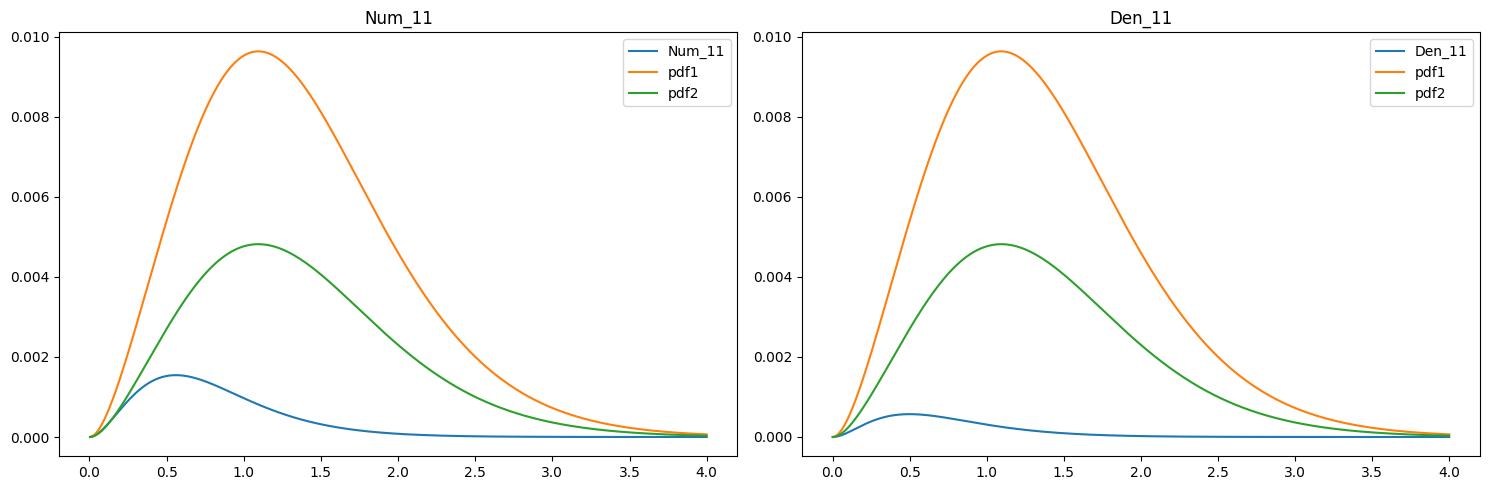

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_11_2d, Den_11_2d]
titles = ['Num_11', 'Den_11']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [21]:
def Num11(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den11(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [22]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_11 = monte_carlo_integration(samples_p1, p1, Num11, Den11)[0]
E_p2_11 = monte_carlo_integration(samples_p2, p2, Num11, Den11)[0]
Den_p1_11 = monte_carlo_integration(samples_p1, p1, Num11, Den11)[2]
Den_p2_11 = monte_carlo_integration(samples_p2, p2, Num11, Den11)[2]

print(f"Estimated E using P1: {E_p1_11}")
print(f"Denominator using P1: {Den_p1_11}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_11}")
print(f"Denominator using P2: {Den_p2_11}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.811281952638851
Denominator using P1: 0.013129006813743158
Number of Samples Collected: 90000
Number of Samples Accepted: 75878
Fraction Acceptances: 0.75878

Estimated E using P2: -2.7816604904254905
Denominator using P2: 0.03249994391555477
Number of Samples Collected: 90000
Number of Samples Accepted: 52092
Fraction Acceptances: 0.52092



In [23]:
## Orthogonal vectors
u1_p1 = Phi_1 / np.sqrt(Den_p1_11)
u1_p2 = Phi_1 / np.sqrt(Den_p2_11)

In [24]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_11 = u1_p1*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_11 = u1_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_11)
S_p2_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_11)

In [25]:
def S11_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S11_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [26]:
S_11_p1 = MCI(samples_p1, p1, S11_p1)
S_11_p2 = MCI(samples_p2, p2, S11_p2)

print(f"Estimated S11 using P1: {S_11_p1}")
print(f"Estimated S11 using P2: {S_11_p2}")

Estimated S11 using P1: 0.11458187820830647
Estimated S11 using P2: 0.18027740822286842


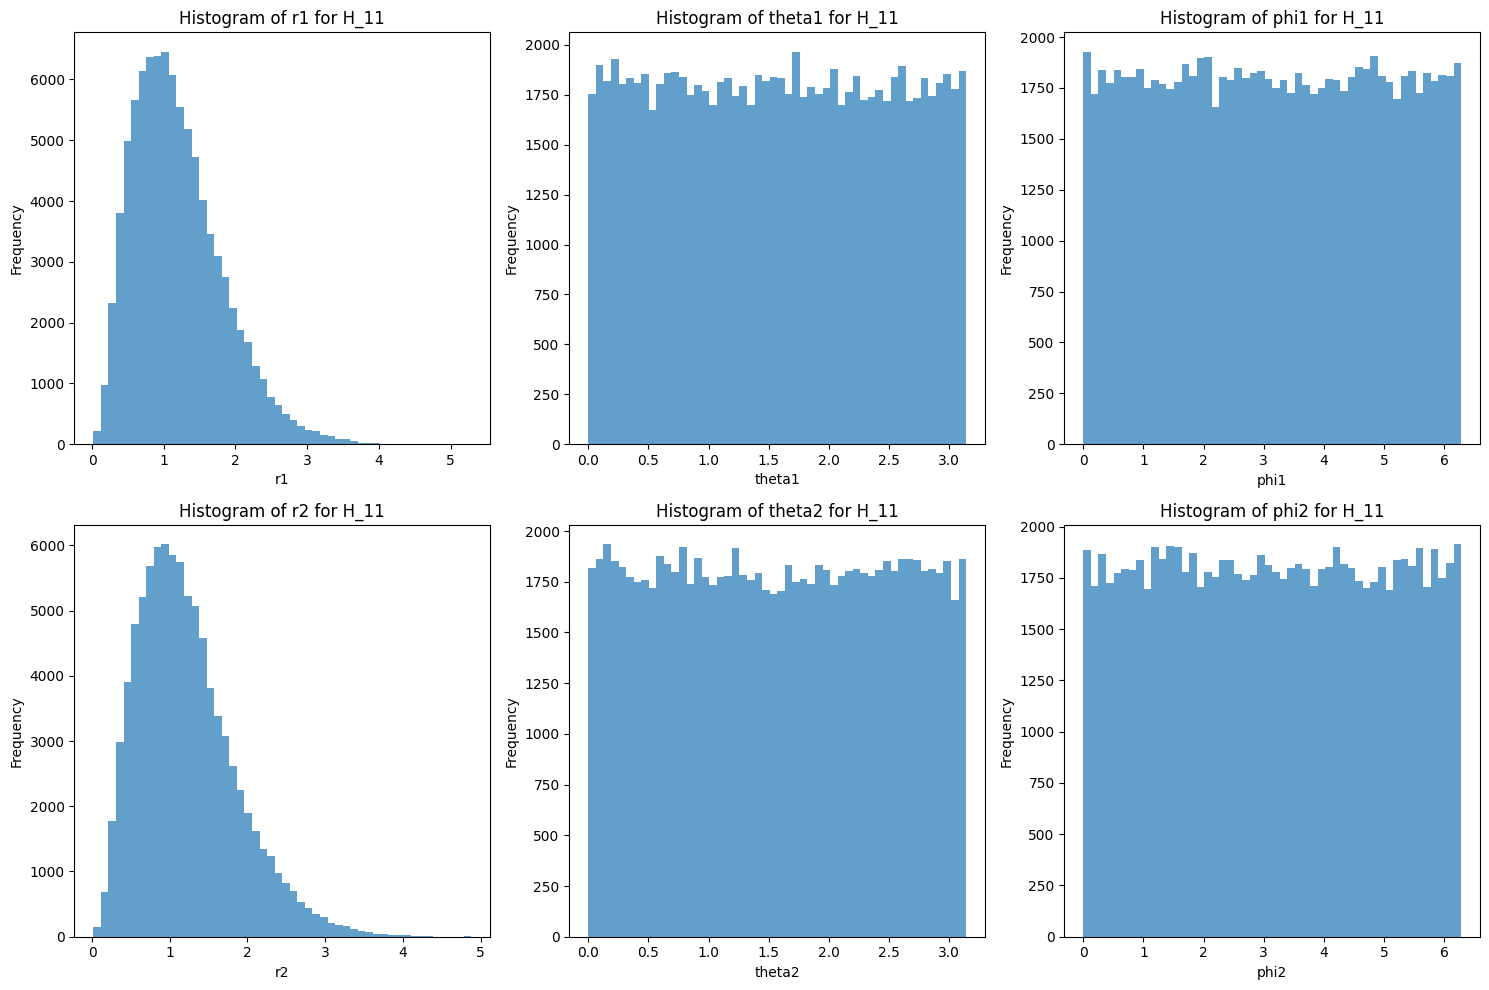

In [27]:
# Plotting histograms for each of the variables to see the distribution of the samples.
## This is for pdf1 where samples were obtained from metropolis sampling1

variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_p1[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for H_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

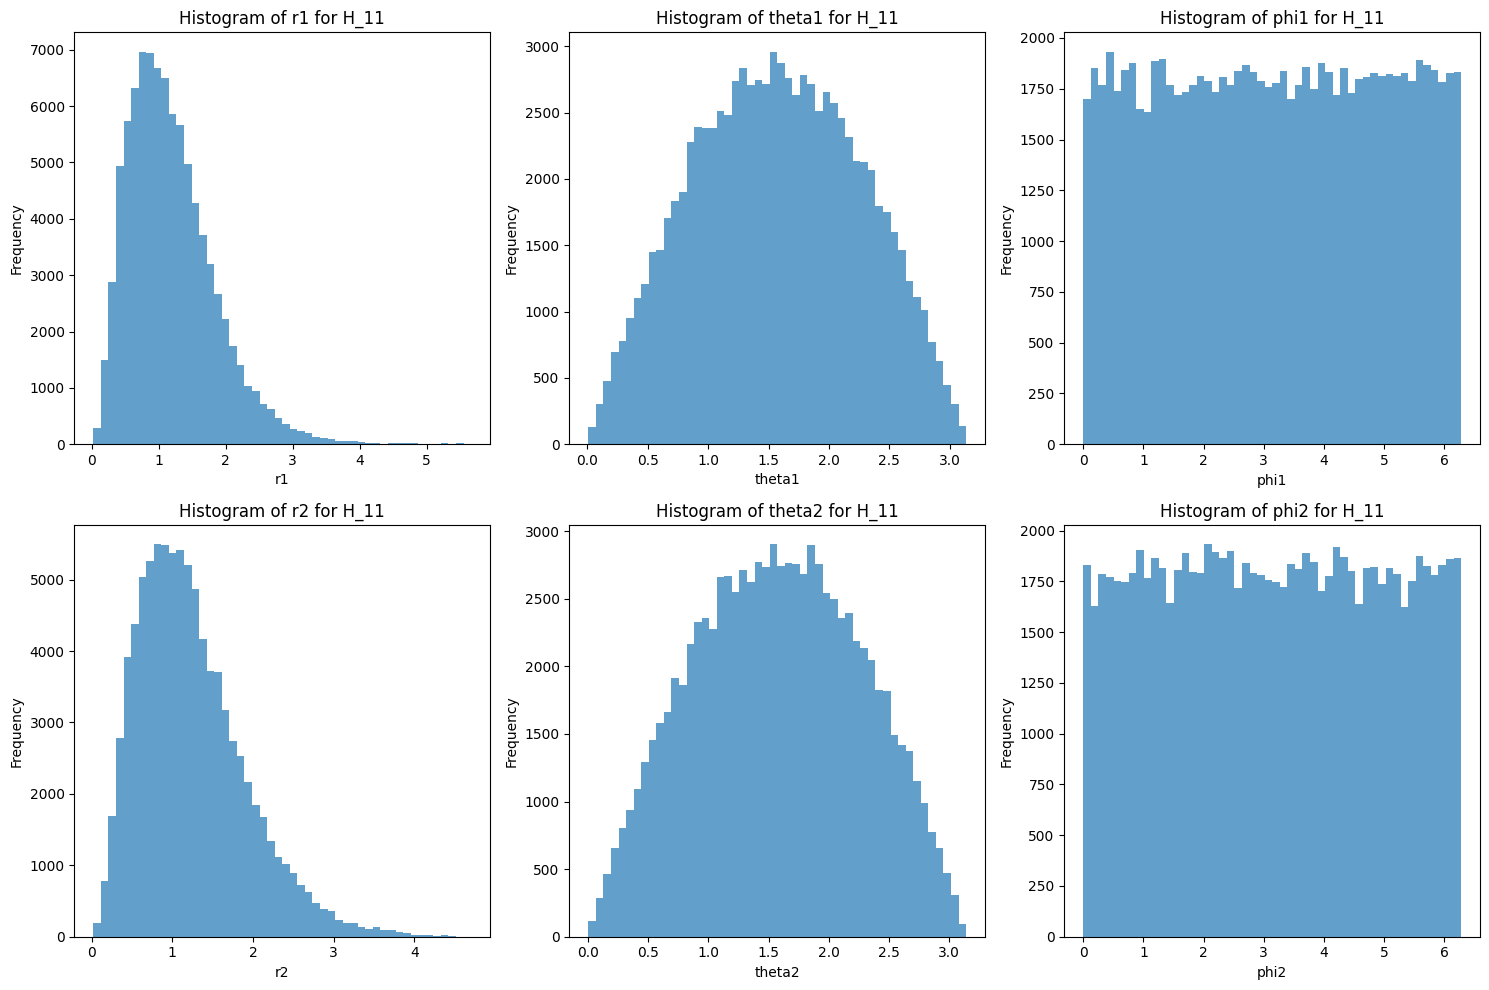

In [28]:
# Plotting histograms for each of the variables to see the distribution of the samples.
## This is for pdf1 where samples were obtained from metropolis sampling1

variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_p2[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for H_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

## H_12

In [29]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi2 = Hamiltonian_modified.subs(Psi, Phi_2).simplify()

Num_12 = (Phi_1 * H_Phi2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_12 = (Phi_1*Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [30]:
Num_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_12)
Den_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_12)

In [31]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [32]:
Num_12_2d = Num_12_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_12_2d = Den_12_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in divide
  return (1.0*r1**3*r2**2/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 2.0*r1**3*r2 + 1.0*r1**2*r2**3/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 4.0*r1**2*r2**2*(r1 + r2 - 1)*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2) - 4.0*r1**2*r2**2 - 1.0*r1**2*r2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2) - 2.0*r1*r2**3 - 1.0*r1*r2**2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2))*exp(-4*r1 - 4*r2)*sin(theta1)*sin(theta2)


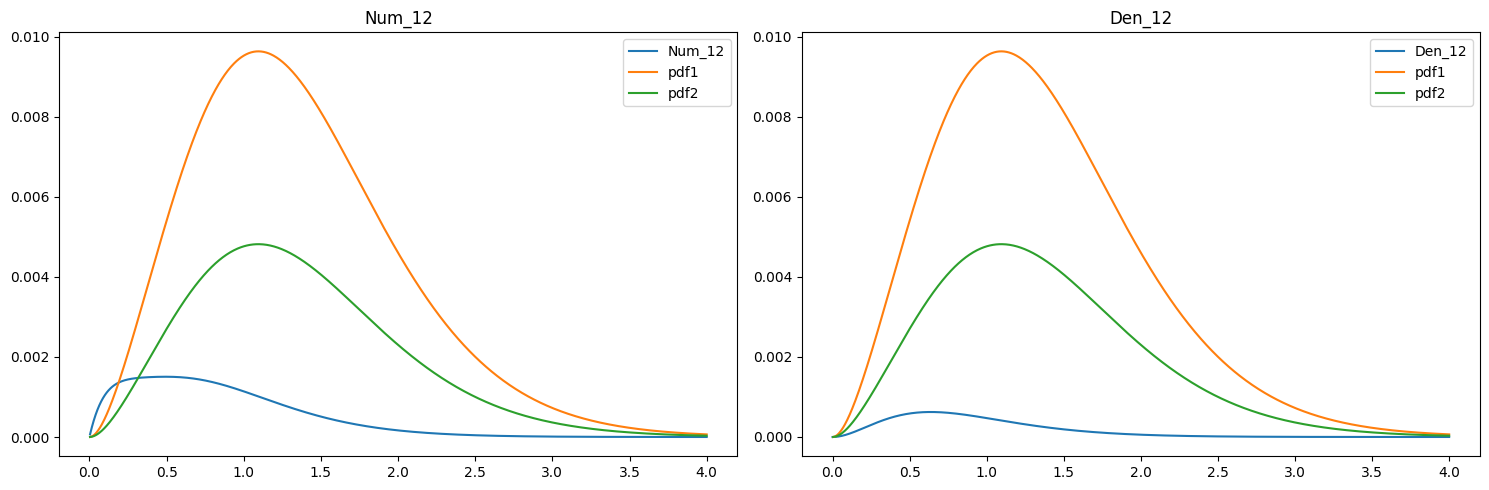

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_12_2d, Den_12_2d]
titles = ['Num_12', 'Den_12']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [34]:
def Num12(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_12_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den12(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_12_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [35]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_12 = monte_carlo_integration(samples_p1, p1, Num12, Den12)[0]
E_p2_12 = monte_carlo_integration(samples_p2, p2, Num12, Den12)[0]
Den_p1_12 = monte_carlo_integration(samples_p1, p1, Num12, Den12)[2]
Den_p2_12 = monte_carlo_integration(samples_p2, p2, Num12, Den12)[2]

print(f"Estimated E using P1: {E_p1_12}")
print(f"Denominator using P1: {Den_p1_12}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_12}")
print(f"Denominator using P2: {Den_p2_12}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.83993883026722
Denominator using P1: 0.021069728627451875
Number of Samples Collected: 90000
Number of Samples Accepted: 75595
Fraction Acceptances: 0.75595

Estimated E using P2: -2.789158056622843
Denominator using P2: 0.048770018547283224
Number of Samples Collected: 90000
Number of Samples Accepted: 52028
Fraction Acceptances: 0.52028



In [36]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_12 = u1_p1*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_12 = u1_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_12)
S_p2_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_12)

In [37]:
def S12_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_12_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S12_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_12_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [38]:
S_12_p1 = MCI(samples_p1, p1, S12_p1)
S_12_p2 = MCI(samples_p2, p2, S12_p2)

print(f"Estimated S12 using P1: {S_12_p1}")
print(f"Estimated S12 using P2: {S_12_p2}")

Estimated S12 using P1: 0.18388360320946878
Estimated S12 using P2: 0.2705276220023706


## H_13

In [39]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi3 = Hamiltonian_modified.subs(Psi, Phi_3).simplify()

Num_13 = (Phi_1 * H_Phi3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_13 = (Phi_1*Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [40]:
Num_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_13, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_13)

In [41]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [42]:
Num_13_2d = Num_13_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_13_2d = Den_13_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-11>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(-0.5*r1**2*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 0.5*r1**2*(cos(phi1 - phi2)/abs(r1*r2) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2)*sin(theta2)) - 0.5*r2**2*((sin(theta1)*cos(th

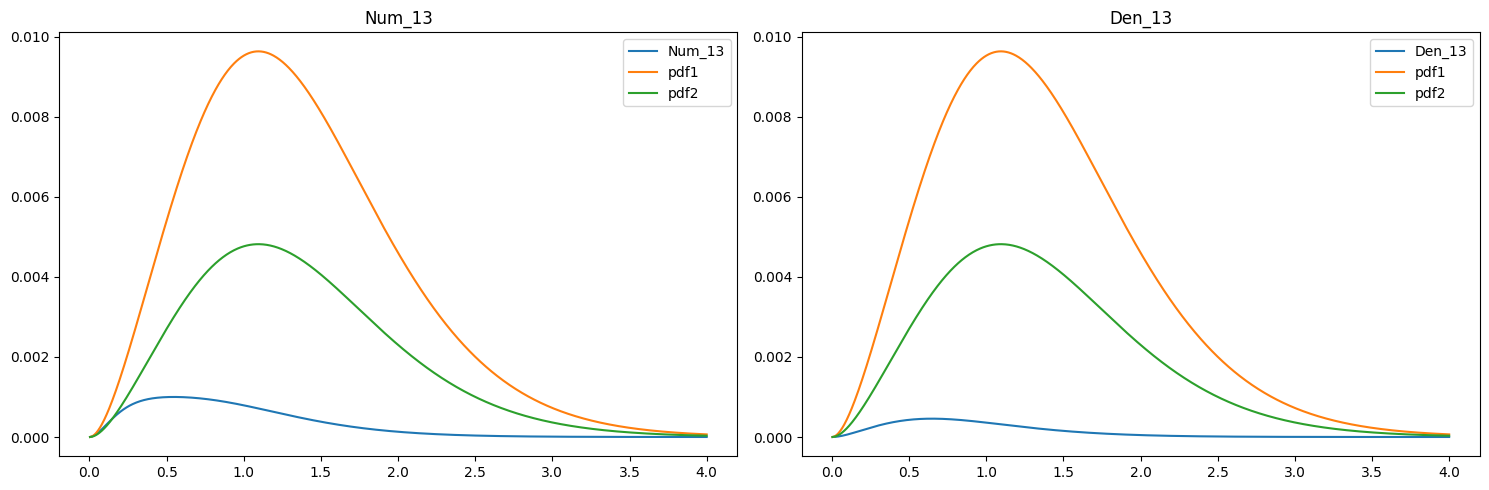

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_13_2d, Den_13_2d]
titles = ['Num_13', 'Den_13']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [44]:
def Num13(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_13_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den13(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_13_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [45]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_13 = monte_carlo_integration(samples_p1, p1, Num13, Den13)[0]
E_p2_13 = monte_carlo_integration(samples_p2, p2, Num13, Den13)[0]
Den_p1_13 = monte_carlo_integration(samples_p1, p1, Num13, Den13)[2]
Den_p2_13 = monte_carlo_integration(samples_p2, p2, Num13, Den13)[2]

print(f"Estimated E using P1: {E_p1_13}")
print(f"Denominator using P1: {Den_p1_13}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_13}")
print(f"Denominator using P2: {Den_p2_13}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -3.0173571101775143
Denominator using P1: 0.014623599792067479
Number of Samples Collected: 90000
Number of Samples Accepted: 75552
Fraction Acceptances: 0.75552

Estimated E using P2: -3.0437811917110014
Denominator using P2: 0.036910817707538665
Number of Samples Collected: 90000
Number of Samples Accepted: 52010
Fraction Acceptances: 0.5201



In [46]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_13 = u1_p1*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_13 = u1_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_13)
S_p2_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_13)

In [47]:
def S13_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_13_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S13_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_13_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [48]:
S_13_p1 = MCI(samples_p1, p1, S13_p1)
S_13_p2 = MCI(samples_p2, p2, S13_p2)

print(f"Estimated S13 using P1: {S_13_p1}")
print(f"Estimated S13 using P2: {S_13_p2}")

Estimated S13 using P1: 0.12762576439428072
Estimated S13 using P2: 0.20474455491343402


## H_14

In [49]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi4 = Hamiltonian_modified.subs(Psi, Phi_4).simplify()

Num_14 = (Phi_1 * H_Phi4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_14 = (Phi_1*Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [50]:
Num_14_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_14)
Den_14_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_14)

In [51]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [52]:
Num_14_2d = Num_14_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_14_2d = Den_14_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-15>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r1*exp(-2*r1 - 2*r2))/r2 - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r2*exp(-2*r1 - 2*r2))/r1)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-15>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r1*exp(-2*

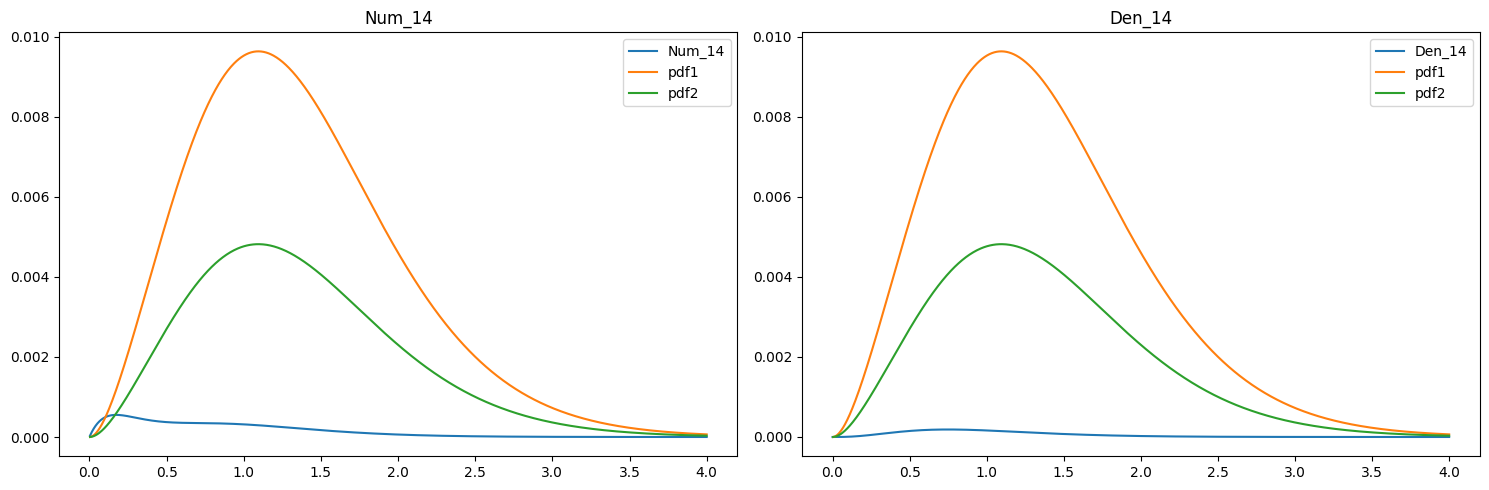

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_14_2d, Den_14_2d]
titles = ['Num_14', 'Den_14']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [54]:
def Num14(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_14_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den14(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_14_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [55]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_14 = monte_carlo_integration(samples_p1, p1, Num14, Den14)[0]
E_p2_14 = monte_carlo_integration(samples_p2, p2, Num14, Den14)[0]
Den_p1_14 = monte_carlo_integration(samples_p1, p1, Num14, Den14)[2]
Den_p2_14 = monte_carlo_integration(samples_p2, p2, Num14, Den14)[2]

print(f"Estimated E using P1: {E_p1_14}")
print(f"Denominator using P1: {Den_p1_14}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_14}")
print(f"Denominator using P2: {Den_p2_14}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.691197712920758
Denominator using P1: 0.007872049290231381
Number of Samples Collected: 90000
Number of Samples Accepted: 75385
Fraction Acceptances: 0.75385

Estimated E using P2: -2.680869303054061
Denominator using P2: 0.01943279075211126
Number of Samples Collected: 90000
Number of Samples Accepted: 51621
Fraction Acceptances: 0.51621



In [56]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_14 = u1_p1*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_14 = u1_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_14_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_14)
S_p2_14_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_14)

In [57]:
def S14_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_14_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S14_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_14_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [58]:
S_14_p1 = MCI(samples_p1, p1, S14_p1)
S_14_p2 = MCI(samples_p2, p2, S14_p2)

print(f"Estimated S14 using P1: {S_14_p1}")
print(f"Estimated S14 using P2: {S_14_p2}")

Estimated S14 using P1: 0.06870239354883184
Estimated S14 using P2: 0.10779382144260369


## H_15

In [59]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi5 = Hamiltonian_modified.subs(Psi, Phi_5).simplify()

Num_15 = (Phi_1 * H_Phi5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_15 = (Phi_1*Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [60]:
Num_15_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_15)
Den_15_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_15)

In [61]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [62]:
Num_15_2d = Num_15_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_15_2d = Den_15_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-19>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(-(r1 + r2)**2*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r2) - 4*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2))) + 2*r2*(-2*(r1 + r2)**2*exp(-2*r1 - 2*r2) + (2*r1 + 2*r2)*exp(-2*r1 - 2*r2)))/r2**2 - 0.5*(2*r1**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r2) - 4*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2))) + 2*r1*(-2*(r1 + r2)**2*exp(-2*r1 - 2*r2) + (2*r1 + 2*r2)*exp(-2*r1 - 2*r2)))/r1**2)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-19>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(-(r1 + r2)**2*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r2)

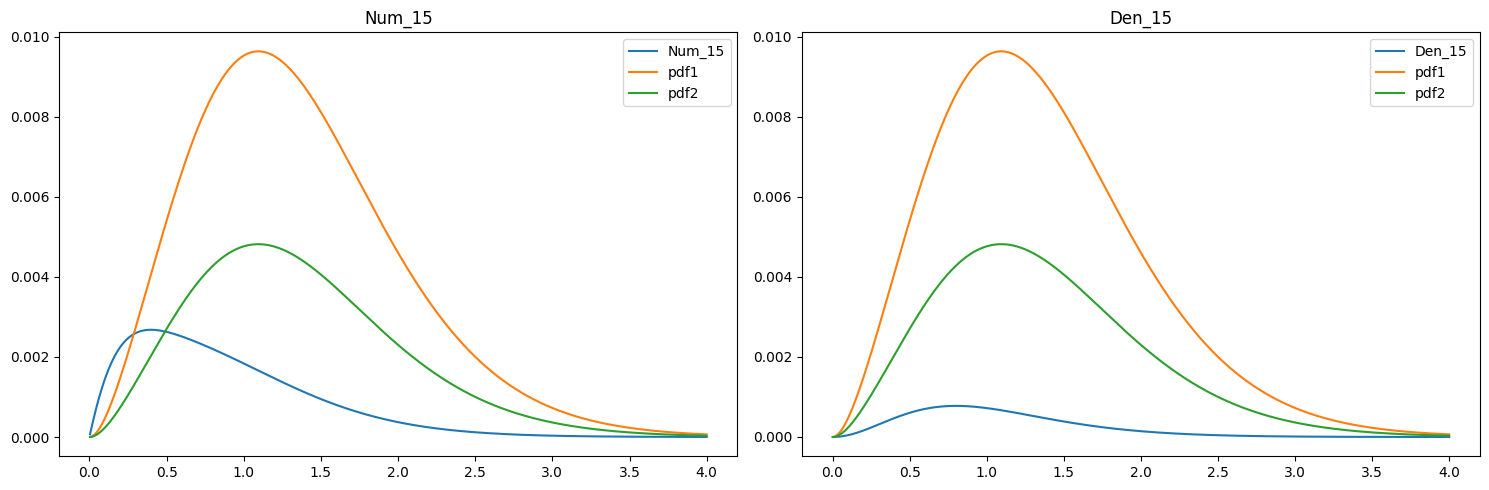

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_15_2d, Den_15_2d]
titles = ['Num_15', 'Den_15']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [64]:
def Num15(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_15_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den15(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_15_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [65]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_15 = monte_carlo_integration(samples_p1, p1, Num15, Den15)[0]
E_p2_15 = monte_carlo_integration(samples_p2, p2, Num15, Den15)[0]
Den_p1_15 = monte_carlo_integration(samples_p1, p1, Num15, Den15)[2]
Den_p2_15 = monte_carlo_integration(samples_p2, p2, Num15, Den15)[2]

print(f"Estimated E using P1: {E_p1_15}")
print(f"Denominator using P1: {Den_p1_15}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_15}")
print(f"Denominator using P2: {Den_p2_15}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.8941690249645378
Denominator using P1: 0.03594794461142637
Number of Samples Collected: 90000
Number of Samples Accepted: 75530
Fraction Acceptances: 0.7553

Estimated E using P2: -2.9381483356051805
Denominator using P2: 0.08922373955092644
Number of Samples Collected: 90000
Number of Samples Accepted: 52178
Fraction Acceptances: 0.52178



In [66]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_15 = u1_p1*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_15 = u1_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_15_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_15)
S_p2_15_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_15)

In [67]:
def S15_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_15_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S15_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_15_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [68]:
S_15_p1 = MCI(samples_p1, p1, S15_p1)
S_15_p2 = MCI(samples_p2, p2, S15_p2)

print(f"Estimated S15 using P1: {S_15_p1}")
print(f"Estimated S15 using P2: {S_15_p2}")

Estimated S15 using P1: 0.3137315007707772
Estimated S15 using P2: 0.49492468540829737


## H_16

In [69]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi6 = Hamiltonian_modified.subs(Psi, Phi_6).simplify()

Num_16 = (Phi_1 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_16 = (Phi_1*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [70]:
Num_16_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_16, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_16_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_16)

In [71]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [72]:
Num_16_2d = Num_16_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_16_2d = Den_16_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-23>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(-1.0*r1**2*exp(-2*r1 - 2*r2)*sin(theta1)*cos(phi1 - phi2)/(sin(theta2)*abs(r1*r2)) - 1.0*r2**2*exp(-2*r1 - 2*r2)*sin(theta2)*cos(phi1 - phi2)/(sin(theta1)*abs(r1*r2)) - (-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2)*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(-4*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 8*r1**2*r2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*DiracDelta(r1*r2) - 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 2*r1**2 - 4*r1*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*

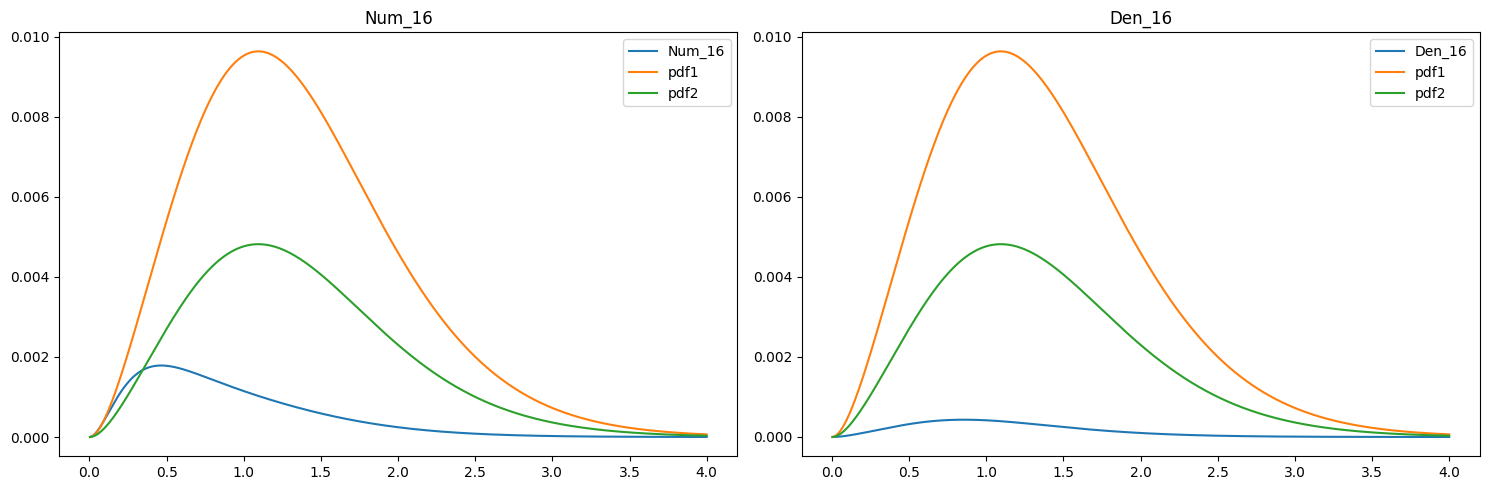

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_16_2d, Den_16_2d]
titles = ['Num_16', 'Den_16']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [74]:
def Num16(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_16_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den16(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_16_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [75]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_16 = monte_carlo_integration(samples_p1, p1, Num16, Den16)[0]
E_p2_16 = monte_carlo_integration(samples_p2, p2, Num16, Den16)[0]
Den_p1_16 = monte_carlo_integration(samples_p1, p1, Num16, Den16)[2]
Den_p2_16 = monte_carlo_integration(samples_p2, p2, Num16, Den16)[2]

print(f"Estimated E using P1: {E_p1_16}")
print(f"Denominator using P1: {Den_p1_16}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_16}")
print(f"Denominator using P2: {Den_p2_16}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -3.190382678810473
Denominator using P1: 0.020819235401996705
Number of Samples Collected: 90000
Number of Samples Accepted: 75482
Fraction Acceptances: 0.75482

Estimated E using P2: -3.173460934017531
Denominator using P2: 0.05121573313037914
Number of Samples Collected: 90000
Number of Samples Accepted: 51936
Fraction Acceptances: 0.51936



In [76]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_16 = u1_p1*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_16 = u1_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_16_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_16)
S_p2_16_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_16)

In [77]:
def S16_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_16_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S16_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_16_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [78]:
S_16_p1 = MCI(samples_p1, p1, S16_p1)
S_16_p2 = MCI(samples_p2, p2, S16_p2)

print(f"Estimated S16 using P1: {S_16_p1}")
print(f"Estimated S16 using P2: {S_16_p2}")

Estimated S16 using P1: 0.18169745275206586
Estimated S16 using P2: 0.28409401729951383


## H_17

In [79]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi7 = Hamiltonian_modified.subs(Psi, Phi_7).simplify()

Num_17 = (Phi_1 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_17 = (Phi_1*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [80]:
Num_17_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_17, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_17_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_17)

In [81]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [82]:
Num_17_2d = Num_17_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_17_2d = Den_17_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-27>:2: RuntimeWarning: divide by zero encountered in divide
  return (-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1 + r2)*(cos(phi1 - phi2)/abs(r1*r2) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 

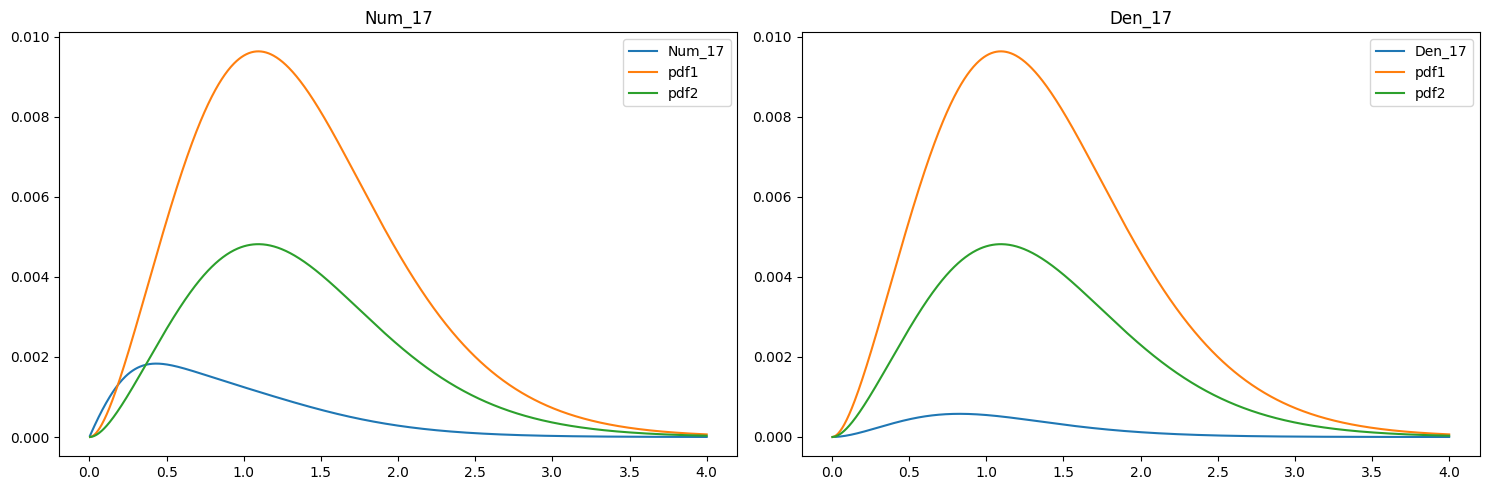

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_17_2d, Den_17_2d]
titles = ['Num_17', 'Den_17']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [84]:
def Num17(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_17_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den17(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_17_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [85]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_17 = monte_carlo_integration(samples_p1, p1, Num17, Den17)[0]
E_p2_17 = monte_carlo_integration(samples_p2, p2, Num17, Den17)[0]
Den_p1_17 = monte_carlo_integration(samples_p1, p1, Num17, Den17)[2]
Den_p2_17 = monte_carlo_integration(samples_p2, p2, Num17, Den17)[2]

print(f"Estimated E using P1: {E_p1_17}")
print(f"Denominator using P1: {Den_p1_17}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_17}")
print(f"Denominator using P2: {Den_p2_17}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -3.0923399453137423
Denominator using P1: 0.026637342279529973
Number of Samples Collected: 90000
Number of Samples Accepted: 75698
Fraction Acceptances: 0.75698

Estimated E using P2: -3.077095236473596
Denominator using P2: 0.06509834086157175
Number of Samples Collected: 90000
Number of Samples Accepted: 52082
Fraction Acceptances: 0.52082



In [86]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_17 = u1_p1*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_17 = u1_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_17_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_17)
S_p2_17_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_17)

In [87]:
def S17_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_17_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S17_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_17_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [88]:
S_17_p1 = MCI(samples_p1, p1, S17_p1)
S_17_p2 = MCI(samples_p2, p2, S17_p2)

print(f"Estimated S17 using P1: {S_17_p1}")
print(f"Estimated S17 using P2: {S_17_p2}")

Estimated S17 using P1: 0.232474303057802
Estimated S17 using P2: 0.36110093607011323


## H_22

In [89]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_22 = (Phi_2 * H_Phi2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_22 = (Phi_2*Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [90]:
Num_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_22)
Den_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_22)

In [91]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [92]:
Num_22_2d = Num_22_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_22_2d = Den_22_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-31>:2: RuntimeWarning: invalid value encountered in divide
  return (r1 + r2)*(1.0*r1**3*r2**2/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 2.0*r1**3*r2 + 1.0*r1**2*r2**3/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 4.0*r1**2*r2**2*(r1 + r2 - 1)*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2) - 4.0*r1**2*r2**2 - 1.0*r1**2*r2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2) - 2.0*r1*r2**3 - 1.0*r1*r2**2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2))*exp(-4*r1 - 4*r2)*sin(theta1)*sin(theta2)


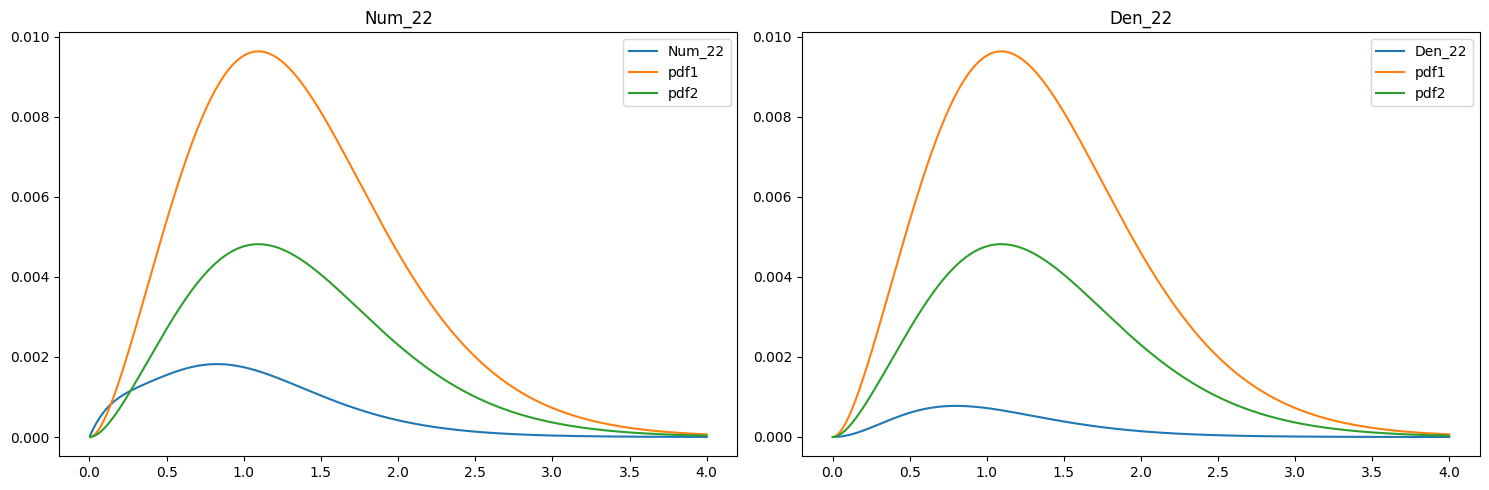

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_22_2d, Den_22_2d]
titles = ['Num_22', 'Den_22']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [94]:
def Num22(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_22_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den22(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_22_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [95]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_22 = monte_carlo_integration(samples_p1, p1, Num22, Den22)[0]
E_p2_22 = monte_carlo_integration(samples_p2, p2, Num22, Den22)[0]
Den_p1_22 = monte_carlo_integration(samples_p1, p1, Num22, Den22)[2]
Den_p2_22 = monte_carlo_integration(samples_p2, p2, Num22, Den22)[2]

print(f"Estimated E using P1: {E_p1_22}")
print(f"Denominator using P1: {Den_p1_22}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_22}")
print(f"Denominator using P2: {Den_p2_22}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.6461587820955637
Denominator using P1: 0.036964298774638256
Number of Samples Collected: 90000
Number of Samples Accepted: 75595
Fraction Acceptances: 0.75595

Estimated E using P2: -2.6681646737006877
Denominator using P2: 0.09046238739088176
Number of Samples Collected: 90000
Number of Samples Accepted: 51921
Fraction Acceptances: 0.51921



In [96]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_2*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u1_p1*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [97]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_2*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u1_p2*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [98]:
u2_p1 = Phi_2 - (u1_p1 * I_p1)
u2_p2 = Phi_2 - (u1_p2 * I_p2)

In [99]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p1 = u2_p1*u2_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm__p2 = u2_p2*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Norm_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p1)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I1 = MCI(samples_p1, p1, Norm_p1)
I2 = MCI(samples_p2, p2, Norm_p2)

In [100]:
u2_p1 = u2_p1 / np.sqrt(I1)
u2_p2 = u2_p2 / np.sqrt(I2)

In [101]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_21 = u2_p1*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_21 = u2_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_22 = u2_p1*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_22 = u2_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_21_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_21)
S_p2_21_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_21)
S_p1_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_22)
S_p2_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_22)

In [102]:
def S21_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_21_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S21_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_21_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [103]:
def S22_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_22_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S22_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_22_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [104]:
S_21_p1 = MCI(samples_p1, p1, S21_p1)
S_21_p2 = MCI(samples_p2, p2, S21_p2)

S_22_p1 = MCI(samples_p1, p1, S22_p1)
S_22_p2 = MCI(samples_p2, p2, S22_p2)

print(f"Estimated S21 using P1: {S_21_p1}")
print(f"Estimated S21 using P2: {S_21_p2}")
print(f"Estimated S22 using P1: {S_22_p1}")
print(f"Estimated S22 using P2: {S_22_p2}")

Estimated S21 using P1: 1.8126734681168777e-16
Estimated S21 using P2: -7.49385738648319e-16
Estimated S22 using P1: 0.07132160673536327
Estimated S22 using P2: 0.10752754673676461


## H_23

In [105]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_23 = (Phi_2 * H_Phi3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_23 = (Phi_2*Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [106]:
Num_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_23, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_23)

In [107]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [108]:
Num_23_2d = Num_23_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_23_2d = Den_23_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-43>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(r1 + r2)*(-0.5*r1**2*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 0.5*r1**2*(cos(phi1 - phi2)/abs(r1*r2) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2)*sin(theta2)) - 0.5*r2**2*((sin(thet

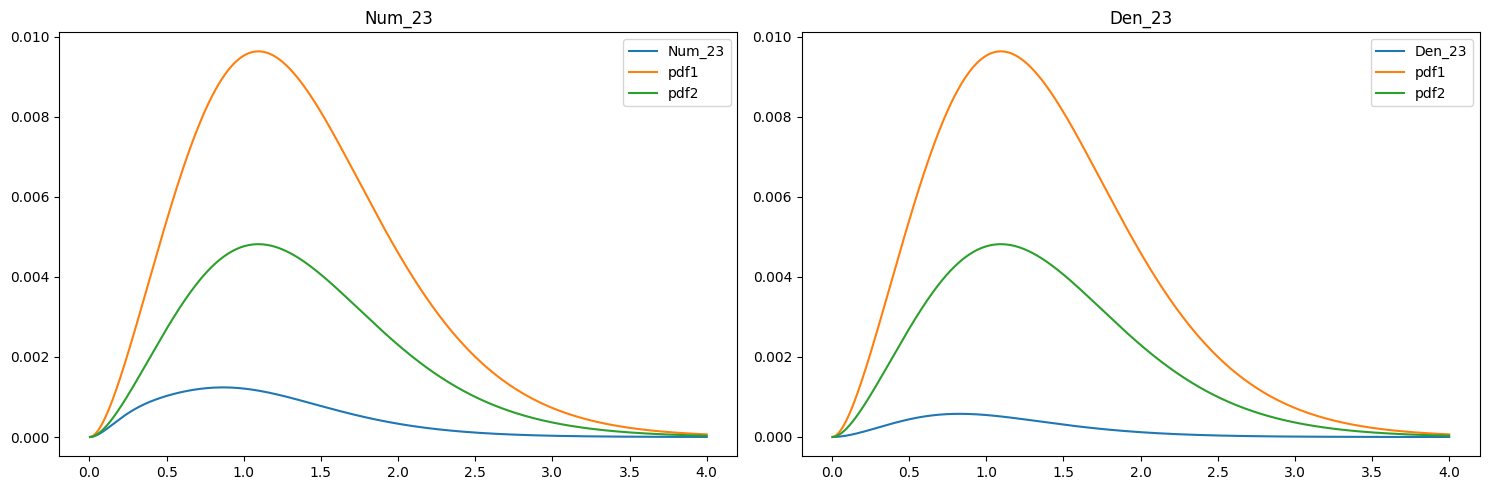

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_23_2d, Den_23_2d]
titles = ['Num_23', 'Den_23']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [110]:
def Num23(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_23_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den23(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_23_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [111]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_23 = monte_carlo_integration(samples_p1, p1, Num23, Den23)[0]
E_p2_23 = monte_carlo_integration(samples_p2, p2, Num23, Den23)[0]
Den_p1_23 = monte_carlo_integration(samples_p1, p1, Num23, Den23)[2]
Den_p2_23 = monte_carlo_integration(samples_p2, p2, Num23, Den23)[2]

print(f"Estimated E using P1: {E_p1_23}")
print(f"Denominator using P1: {Den_p1_23}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_23}")
print(f"Denominator using P2: {Den_p2_23}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.8808193351514433
Denominator using P1: 0.026101407562354795
Number of Samples Collected: 90000
Number of Samples Accepted: 75637
Fraction Acceptances: 0.75637

Estimated E using P2: -2.9077149513921086
Denominator using P2: 0.06423175049916058
Number of Samples Collected: 90000
Number of Samples Accepted: 52612
Fraction Acceptances: 0.52612



In [112]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_23 = u2_p1*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_23 = u2_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_23)
S_p2_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_23)

In [113]:
def S23_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_23_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S23_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_23_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [114]:
S_23_p1 = MCI(samples_p1, p1, S23_p1)
S_23_p2 = MCI(samples_p2, p2, S23_p2)

print(f"Estimated S23 using P1: {S_23_p1}")
print(f"Estimated S23 using P2: {S_23_p2}")

Estimated S23 using P1: 0.056603773231660215
Estimated S23 using P2: 0.0758128781226367


## H_24

In [115]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_24 = (Phi_2 * H_Phi4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_24 = (Phi_2*Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [116]:
Num_24_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_24)
Den_24_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_24)

In [117]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [118]:
Num_24_2d = Num_24_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_24_2d = Den_24_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-47>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(r1 + r2)*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r1*exp(-2*r1 - 2*r2))/r2 - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r2*exp(-2*r1 - 2*r2))/r1)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-47>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(r1 + r2)*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*exp(-2*r1 

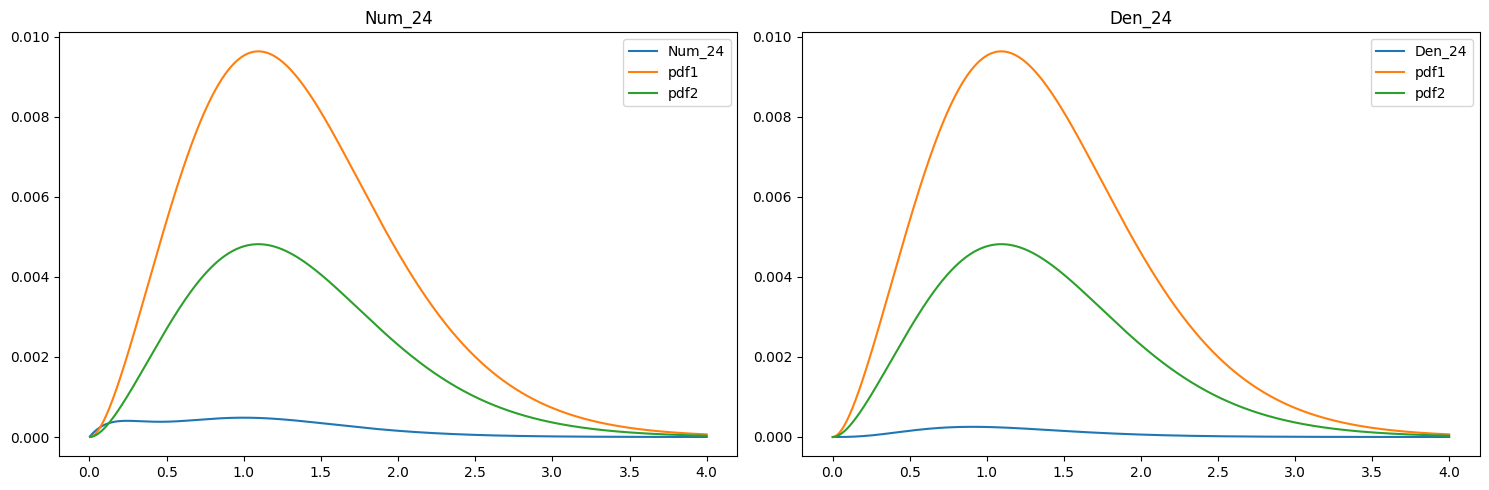

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_24_2d, Den_24_2d]
titles = ['Num_24', 'Den_24']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [120]:
def Num24(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_24_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den24(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_24_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [121]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_24 = monte_carlo_integration(samples_p1, p1, Num24, Den24)[0]
E_p2_24 = monte_carlo_integration(samples_p2, p2, Num24, Den24)[0]
Den_p1_24 = monte_carlo_integration(samples_p1, p1, Num24, Den24)[2]
Den_p2_24 = monte_carlo_integration(samples_p2, p2, Num24, Den24)[2]

print(f"Estimated E using P1: {E_p1_24}")
print(f"Denominator using P1: {Den_p1_24}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_24}")
print(f"Denominator using P2: {Den_p2_24}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.3242498529543227
Denominator using P1: 0.01581404618283828
Number of Samples Collected: 90000
Number of Samples Accepted: 75400
Fraction Acceptances: 0.754

Estimated E using P2: -2.3951662057314858
Denominator using P2: 0.03885189635579533
Number of Samples Collected: 90000
Number of Samples Accepted: 51759
Fraction Acceptances: 0.51759



In [122]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_24 = u2_p1*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_24 = u2_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_24_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_24)
S_p2_24_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_24)

In [123]:
def S24_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_24_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S24_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_24_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [124]:
S_24_p1 = MCI(samples_p1, p1, S24_p1)
S_24_p2 = MCI(samples_p2, p2, S24_p2)

print(f"Estimated S24 using P1: {S_24_p1}")
print(f"Estimated S24 using P2: {S_24_p2}")

Estimated S24 using P1: 0.05479009476729336
Estimated S24 using P2: 0.08003219080544453


## H_25

In [125]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_25 = (Phi_2 * H_Phi5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_25 = (Phi_2*Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [126]:
Num_25_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_25)
Den_25_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_25)

In [127]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [128]:
Num_25_2d = Num_25_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_25_2d = Den_25_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-51>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(r1 + r2)*(-(r1 + r2)**2*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r2) - 4*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2))) + 2*r2*(-2*(r1 + r2)**2*exp(-2*r1 - 2*r2) + (2*r1 + 2*r2)*exp(-2*r1 - 2*r2)))/r2**2 - 0.5*(2*r1**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r2) - 4*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2))) + 2*r1*(-2*(r1 + r2)**2*exp(-2*r1 - 2*r2) + (2*r1 + 2*r2)*exp(-2*r1 - 2*r2)))/r1**2)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-51>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(r1 + r2)*(-(r1 + r2)**2*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(2*(r1 + r2)*

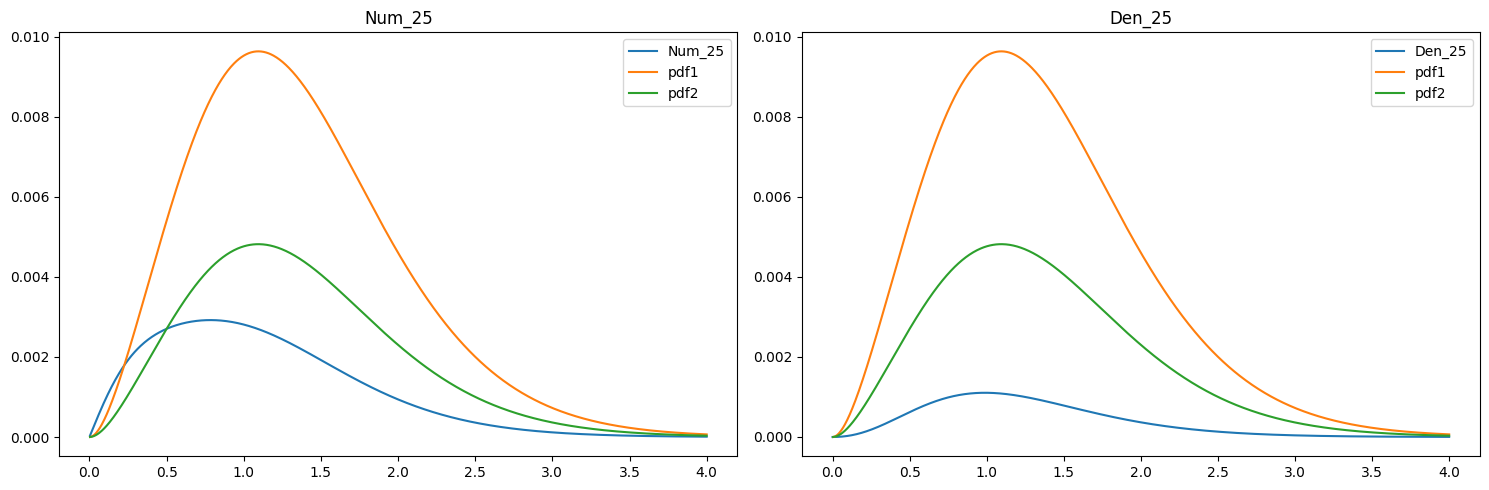

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_25_2d, Den_25_2d]
titles = ['Num_25', 'Den_25']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [130]:
def Num25(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_25_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den25(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_25_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [131]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_25 = monte_carlo_integration(samples_p1, p1, Num25, Den25)[0]
E_p2_25 = monte_carlo_integration(samples_p2, p2, Num25, Den25)[0]
Den_p1_25 = monte_carlo_integration(samples_p1, p1, Num25, Den25)[2]
Den_p2_25 = monte_carlo_integration(samples_p2, p2, Num25, Den25)[2]

print(f"Estimated E using P1: {E_p1_25}")
print(f"Denominator using P1: {Den_p1_25}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_25}")
print(f"Denominator using P2: {Den_p2_25}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.5299478403230684
Denominator using P1: 0.0737271732812033
Number of Samples Collected: 90000
Number of Samples Accepted: 75310
Fraction Acceptances: 0.7531

Estimated E using P2: -2.565607941912295
Denominator using P2: 0.18049879638763072
Number of Samples Collected: 90000
Number of Samples Accepted: 52009
Fraction Acceptances: 0.52009



In [132]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_25 = u2_p1*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_25 = u2_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_25_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_25)
S_p2_25_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_25)

In [133]:
def S25_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_25_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S25_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_25_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [134]:
S_25_p1 = MCI(samples_p1, p1, S25_p1)
S_25_p2 = MCI(samples_p2, p2, S25_p2)

print(f"Estimated S25 using P1: {S_25_p1}")
print(f"Estimated S25 using P2: {S_25_p2}")

Estimated S25 using P1: 0.2521246796867011
Estimated S25 using P2: 0.3839811320640856


## H_26

In [135]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_26 = (Phi_2 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_26 = (Phi_2*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [136]:
Num_26_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_26, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_26_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_26)

In [137]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [138]:
Num_26_2d = Num_26_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_26_2d = Den_26_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-55>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(r1 + r2)*(-1.0*r1**2*exp(-2*r1 - 2*r2)*sin(theta1)*cos(phi1 - phi2)/(sin(theta2)*abs(r1*r2)) - 1.0*r2**2*exp(-2*r1 - 2*r2)*sin(theta2)*cos(phi1 - phi2)/(sin(theta1)*abs(r1*r2)) - (-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2)*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(-4*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 8*r1**2*r2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*DiracDelta(r1*r2) - 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 2*r1**2 - 4*r1*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + co

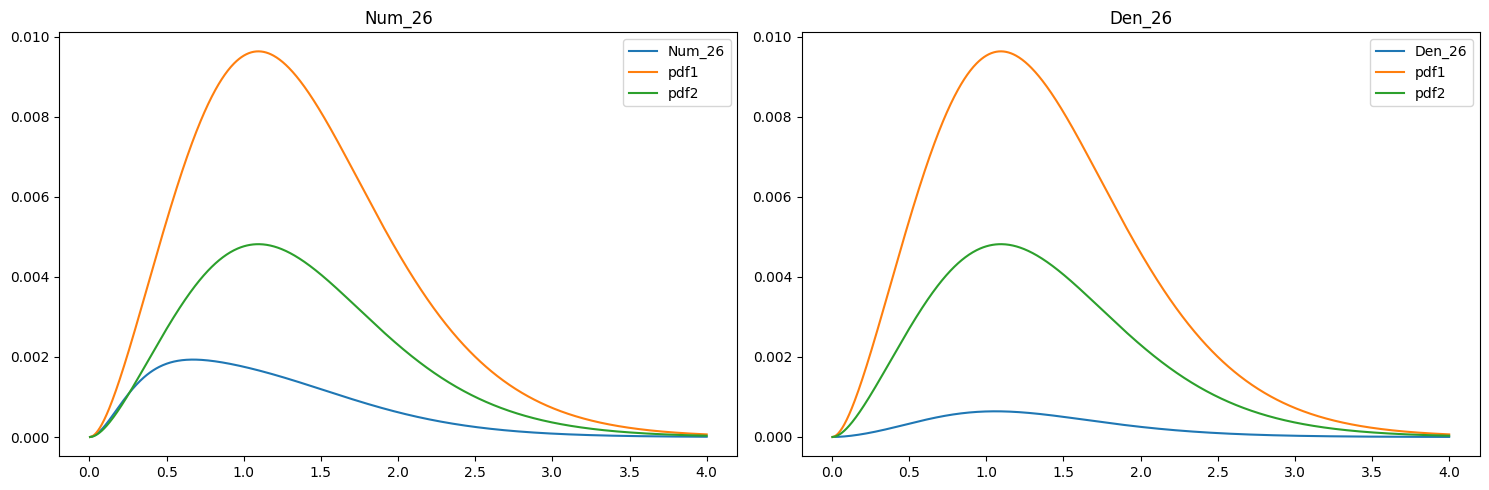

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_26_2d, Den_26_2d]
titles = ['Num_26', 'Den_26']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [140]:
def Num26(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_26_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den26(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_26_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [141]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_26 = monte_carlo_integration(samples_p1, p1, Num26, Den26)[0]
E_p2_26 = monte_carlo_integration(samples_p2, p2, Num26, Den26)[0]
Den_p1_26 = monte_carlo_integration(samples_p1, p1, Num26, Den26)[2]
Den_p2_26 = monte_carlo_integration(samples_p2, p2, Num26, Den26)[2]

print(f"Estimated E using P1: {E_p1_26}")
print(f"Denominator using P1: {Den_p1_26}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_26}")
print(f"Denominator using P2: {Den_p2_26}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.856839851887875
Denominator using P1: 0.041697363666672246
Number of Samples Collected: 90000
Number of Samples Accepted: 75152
Fraction Acceptances: 0.75152

Estimated E using P2: -2.8308351742414866
Denominator using P2: 0.1036440562573251
Number of Samples Collected: 90000
Number of Samples Accepted: 52507
Fraction Acceptances: 0.52507



In [142]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_26 = u2_p1*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_26 = u2_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_26_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_26)
S_p2_26_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_26)

In [143]:
def S26_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_26_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S26_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_26_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [144]:
S_26_p1 = MCI(samples_p1, p1, S26_p1)
S_26_p2 = MCI(samples_p2, p2, S26_p2)

print(f"Estimated S26 using P1: {S_26_p1}")
print(f"Estimated S26 using P2: {S_26_p2}")

Estimated S26 using P1: 0.13983473353432233
Estimated S26 using P2: 0.21626379553138916


## H_27

In [145]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_27 = (Phi_2 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_27 = (Phi_2*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [146]:
Num_27_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_27, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_27_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_27)

In [147]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [148]:
Num_27_2d = Num_27_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_27_2d = Den_27_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-59>:2: RuntimeWarning: divide by zero encountered in divide
  return (r1 + r2)*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1 + r2)*(cos(phi1 - phi2)/abs(r1*r2) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2

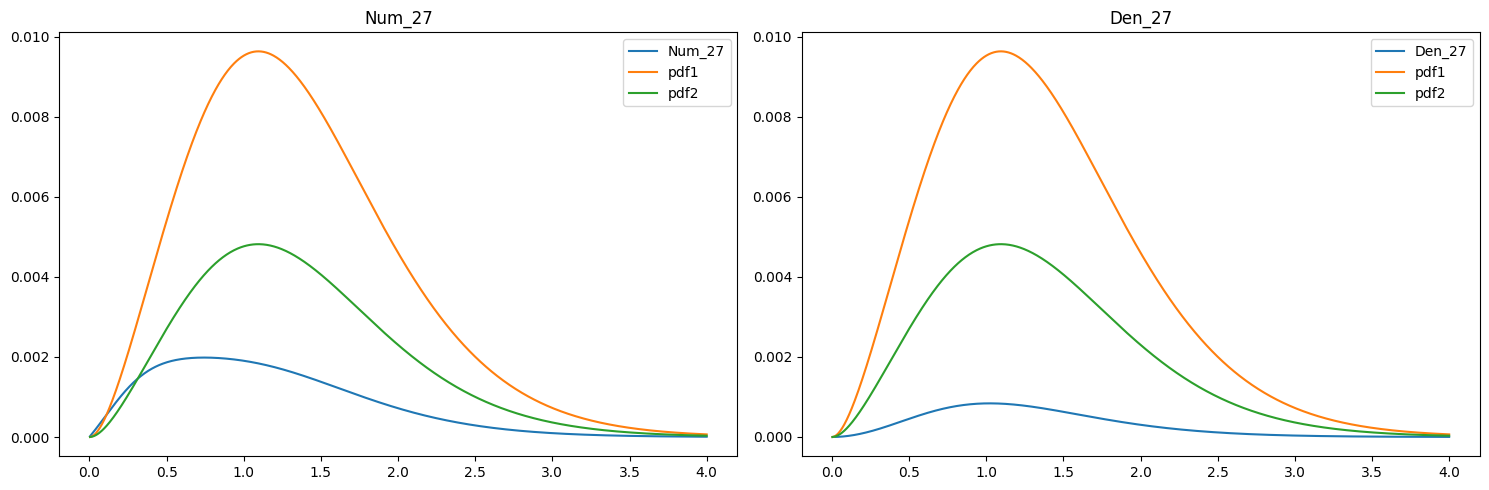

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_27_2d, Den_27_2d]
titles = ['Num_27', 'Den_27']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [150]:
def Num27(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_27_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den27(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_27_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [151]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_27 = monte_carlo_integration(samples_p1, p1, Num27, Den27)[0]
E_p2_27 = monte_carlo_integration(samples_p2, p2, Num27, Den27)[0]
Den_p1_27 = monte_carlo_integration(samples_p1, p1, Num27, Den27)[2]
Den_p2_27 = monte_carlo_integration(samples_p2, p2, Num27, Den27)[2]

print(f"Estimated E using P1: {E_p1_27}")
print(f"Denominator using P1: {Den_p1_27}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_27}")
print(f"Denominator using P2: {Den_p2_27}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.7130292479771136
Denominator using P1: 0.053200740372115876
Number of Samples Collected: 90000
Number of Samples Accepted: 75511
Fraction Acceptances: 0.75511

Estimated E using P2: -2.6903622673731546
Denominator using P2: 0.1320378321840205
Number of Samples Collected: 90000
Number of Samples Accepted: 52278
Fraction Acceptances: 0.52278



In [152]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_27 = u2_p1*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_27 = u2_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_27_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_27)
S_p2_27_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_27)

In [153]:
def S27_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_27_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S27_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_27_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [154]:
S_27_p1 = MCI(samples_p1, p1, S27_p1)
S_27_p2 = MCI(samples_p2, p2, S27_p2)

print(f"Estimated S27 using P1: {S_27_p1}")
print(f"Estimated S27 using P2: {S_27_p2}")

Estimated S27 using P1: 0.18820876633848352
Estimated S27 using P2: 0.2826532049071822


## H_33

In [155]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_33 = (Phi_3 * H_Phi3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_33 = (Phi_3*Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [156]:
Num_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_33, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_33)

In [157]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [158]:
Num_33_2d = Num_33_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_33_2d = Den_33_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-63>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)*(-0.5*r1**2*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 0.5*r1**2*(cos(phi1 - phi2)/abs(r1*r2) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/a

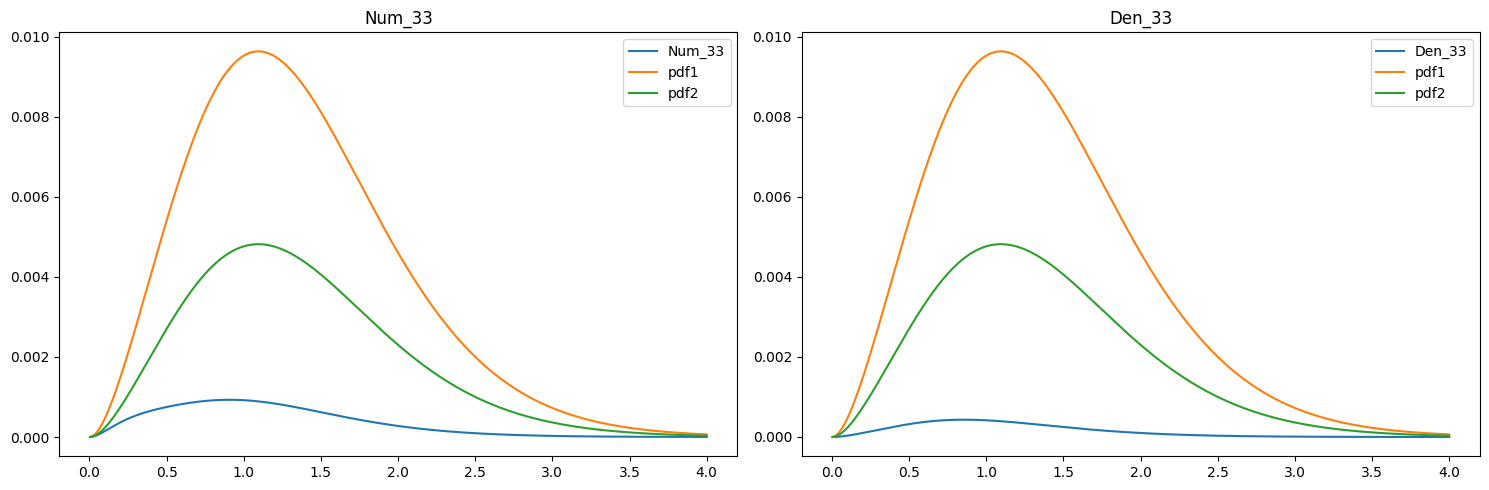

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_33_2d, Den_33_2d]
titles = ['Num_33', 'Den_33']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [160]:
def Num33(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_33_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den33(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_33_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [161]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_33 = monte_carlo_integration(samples_p1, p1, Num33, Den33)[0]
E_p2_33 = monte_carlo_integration(samples_p2, p2, Num33, Den33)[0]
Den_p1_33 = monte_carlo_integration(samples_p1, p1, Num33, Den33)[2]
Den_p2_33 = monte_carlo_integration(samples_p2, p2, Num33, Den33)[2]

print(f"Estimated E using P1: {E_p1_33}")
print(f"Denominator using P1: {Den_p1_33}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_33}")
print(f"Denominator using P2: {Den_p2_33}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.5806632226940565
Denominator using P1: 0.020511535607462574
Number of Samples Collected: 90000
Number of Samples Accepted: 75580
Fraction Acceptances: 0.7558

Estimated E using P2: -2.5779433012780095
Denominator using P2: 0.05002252812455589
Number of Samples Collected: 90000
Number of Samples Accepted: 51767
Fraction Acceptances: 0.51767



In [162]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_3*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u1_p1*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I1_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [163]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_3*u2_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u2_p1*u2_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I2_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [166]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_3*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u1_p2*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I1_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [164]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_3*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u2_p2*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I2_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [167]:
u3_p1 = Phi_3 - (I2_p1 * u2_p1) - (I1_p1 * u1_p1)
u3_p2 = Phi_3 - (I2_p2 * u2_p2) - (I1_p2 * u1_p2)

In [168]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p1 = u3_p1*u3_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm__p2 = u3_p2*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Norm_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p1)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I1 = MCI(samples_p1, p1, Norm_p1)
I2 = MCI(samples_p2, p2, Norm_p2)

In [169]:
u3_p1 = u3_p1 / np.sqrt(I1)
u3_p2 = u3_p2 / np.sqrt(I2)

In [170]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_31 = u3_p1*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_31 = u3_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_32 = u3_p1*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_32 = u3_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_33 = u3_p1*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_33 = u3_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_31_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_31)
S_p2_31_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_31)
S_p1_32_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_32)
S_p2_32_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_32)
S_p1_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_33)
S_p2_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_33)

In [171]:
def S31_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_31_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S31_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_31_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S32_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_32_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S32_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_32_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S33_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_33_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S33_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_33_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [172]:
S_31_p1 = MCI(samples_p1, p1, S31_p1)
S_31_p2 = MCI(samples_p2, p2, S31_p2)

S_32_p1 = MCI(samples_p1, p1, S32_p1)
S_32_p2 = MCI(samples_p2, p2, S32_p2)

S_33_p1 = MCI(samples_p1, p1, S33_p1)
S_33_p2 = MCI(samples_p2, p2, S33_p2)

In [173]:
print(f"Estimated S31 using P1: {S_31_p1}")
print(f"Estimated S31 using P2: {S_31_p2}")

print(f"Estimated S32 using P1: {S_32_p1}")
print(f"Estimated S32 using P2: {S_32_p2}")

print(f"Estimated S33 using P1: {S_33_p1}")
print(f"Estimated S33 using P2: {S_33_p2}")

Estimated S31 using P1: 0.0012365836657672838
Estimated S31 using P2: 0.015594808870847434
Estimated S32 using P1: -0.0037568918092514936
Estimated S32 using P2: 0.030339406908395455
Estimated S33 using P1: 0.03519812863462837
Estimated S33 using P2: 0.08228404885390493


## H_34

In [174]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_34 = (Phi_3 * H_Phi4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_34 = (Phi_3*Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [175]:
Num_34_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_34)
Den_34_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_34)

In [176]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [177]:
Num_34_2d = Num_34_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_34_2d = Den_34_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-81>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r1*exp(-2*r1 - 2*r2))/r2 - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r2*exp(-2*r1 - 2*r2))/r1)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-81>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs

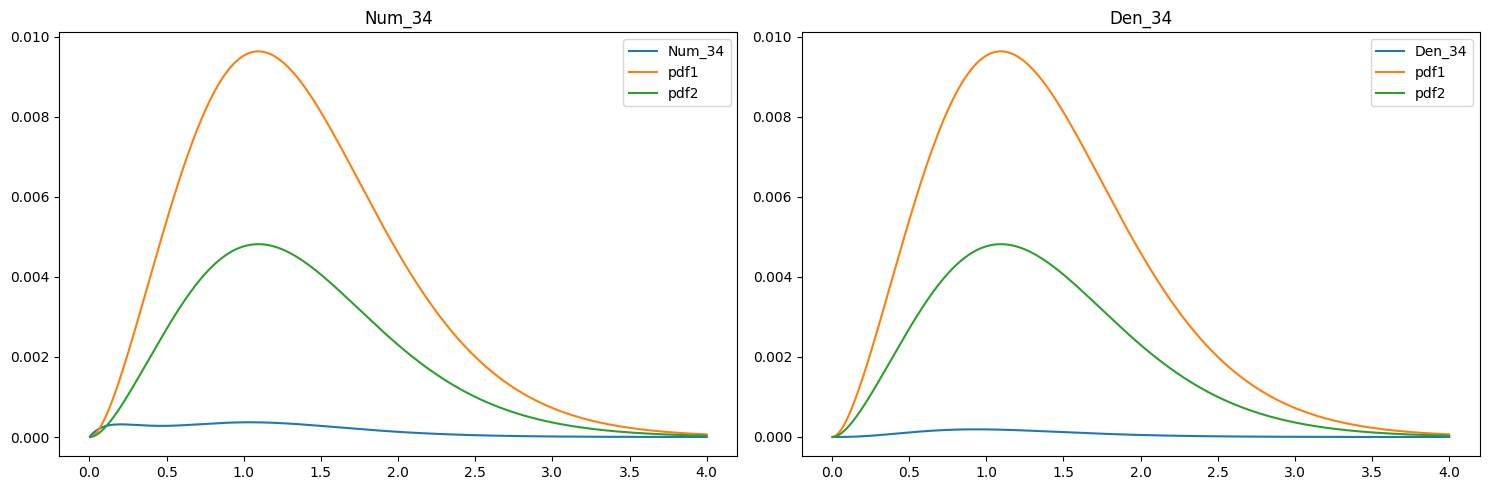

In [178]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_34_2d, Den_34_2d]
titles = ['Num_34', 'Den_34']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [179]:
def Num34(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_34_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den34(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_34_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [180]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_34 = monte_carlo_integration(samples_p1, p1, Num34, Den34)[0]
E_p2_34 = monte_carlo_integration(samples_p2, p2, Num34, Den34)[0]
Den_p1_34 = monte_carlo_integration(samples_p1, p1, Num34, Den34)[2]
Den_p2_34 = monte_carlo_integration(samples_p2, p2, Num34, Den34)[2]

print(f"Estimated E using P1: {E_p1_34}")
print(f"Denominator using P1: {Den_p1_34}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_34}")
print(f"Denominator using P2: {Den_p2_34}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.6076781439815697
Denominator using P1: 0.011382167302716985
Number of Samples Collected: 90000
Number of Samples Accepted: 75453
Fraction Acceptances: 0.75453

Estimated E using P2: -2.605672998897303
Denominator using P2: 0.027896042228320376
Number of Samples Collected: 90000
Number of Samples Accepted: 52329
Fraction Acceptances: 0.52329



In [181]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_34 = u3_p1*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_34 = u3_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_34_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_34)
S_p2_34_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_34)

In [182]:
def S34_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_34_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S34_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_34_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [183]:
S_34_p1 = MCI(samples_p1, p1, S34_p1)
S_34_p2 = MCI(samples_p2, p2, S34_p2)

print(f"Estimated S34 using P1: {S_34_p1}")
print(f"Estimated S34 using P2: {S_34_p2}")

Estimated S34 using P1: -0.00731138221451388
Estimated S34 using P2: 0.007172232628083342


## H_35

In [184]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_35 = (Phi_3 * H_Phi5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_35 = (Phi_3*Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [185]:
Num_35_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_35)
Den_35_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_35)

In [186]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [187]:
Num_35_2d = Num_35_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_35_2d = Den_35_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-85>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(-(r1 + r2)**2*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r2) - 4*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2))) + 2*r2*(-2*(r1 + r2)**2*exp(-2*r1 - 2*r2) + (2*r1 + 2*r2)*exp(-2*r1 - 2*r2)))/r2**2 - 0.5*(2*r1**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r2) - 4*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2))) + 2*r1*(-2*(r1 + r2)**2*exp(-2*r1 - 2*r2) + (2*r1 + 2*r2)*exp(-2*r1 - 2*r2)))/r1**2)*sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-85>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(-(r1 + r2)**2*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1

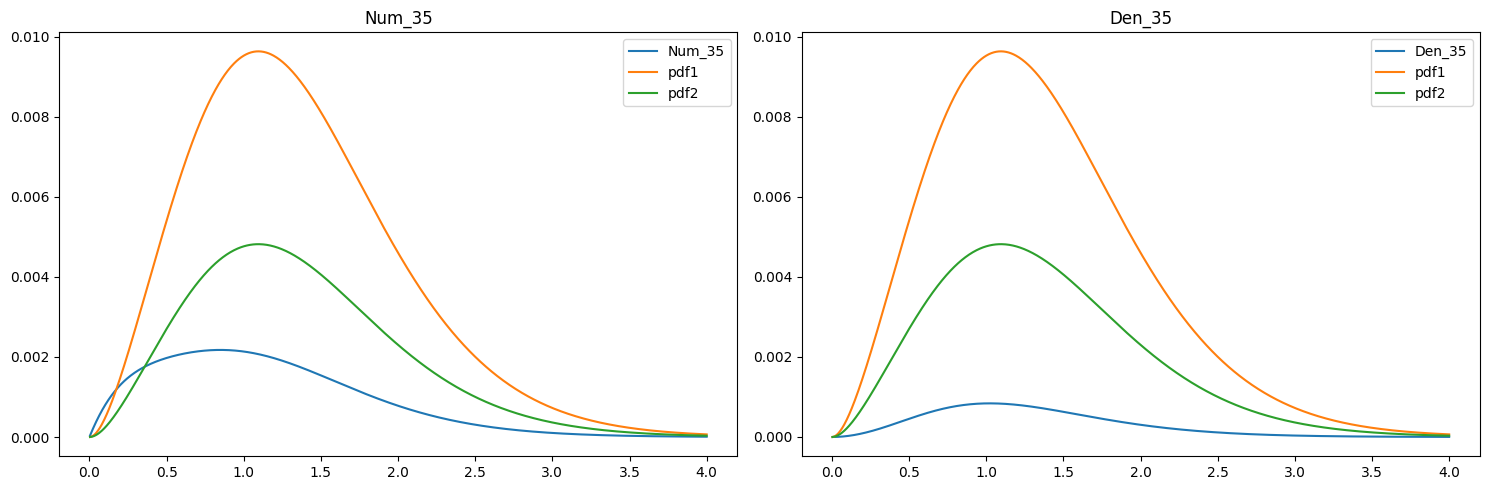

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_35_2d, Den_35_2d]
titles = ['Num_35', 'Den_35']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [189]:
def Num35(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_35_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den35(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_35_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [190]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_35 = monte_carlo_integration(samples_p1, p1, Num35, Den35)[0]
E_p2_35 = monte_carlo_integration(samples_p2, p2, Num35, Den35)[0]
Den_35_p1 = monte_carlo_integration(samples_p1, p1, Num35, Den35)[2]
Den_35_p2 = monte_carlo_integration(samples_p2, p2, Num35, Den35)[2]

print(f"Estimated E using P1: {E_p1_35}")
print(f"Denominator using P1: {Den_35_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_35}")
print(f"Denominator using P2: {Den_35_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.701197928056782
Denominator using P1: 0.05286665168334208
Number of Samples Collected: 90000
Number of Samples Accepted: 75446
Fraction Acceptances: 0.75446

Estimated E using P2: -2.7062213642401236
Denominator using P2: 0.1326669966030001
Number of Samples Collected: 90000
Number of Samples Accepted: 52381
Fraction Acceptances: 0.52381



In [191]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_35 = u3_p1*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_35 = u3_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_35_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_35)
S_p2_35_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_35)

In [192]:
def S35_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_35_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S35_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_35_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [193]:
S_35_p1 = MCI(samples_p1, p1, S35_p1)
S_35_p2 = MCI(samples_p2, p2, S35_p2)

print(f"Estimated S35 using P1: {S_35_p1}")
print(f"Estimated S35 using P2: {S_35_p2}")

Estimated S35 using P1: -0.015400792055767254
Estimated S35 using P2: 0.06495574874467505


## H_36

In [194]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_36 = (Phi_3 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_36 = (Phi_3*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [195]:
Num_36_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_36, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_36_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_36)

In [196]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [197]:
Num_36_2d = Num_36_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_36_2d = Den_36_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-89>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)*(-1.0*r1**2*exp(-2*r1 - 2*r2)*sin(theta1)*cos(phi1 - phi2)/(sin(theta2)*abs(r1*r2)) - 1.0*r2**2*exp(-2*r1 - 2*r2)*sin(theta2)*cos(phi1 - phi2)/(sin(theta1)*abs(r1*r2)) - (-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2)*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(-4*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 8*r1**2*r2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*DiracDelta(r1*r2) - 2*r1**2*(sin(theta1)*sin(theta2)*cos(

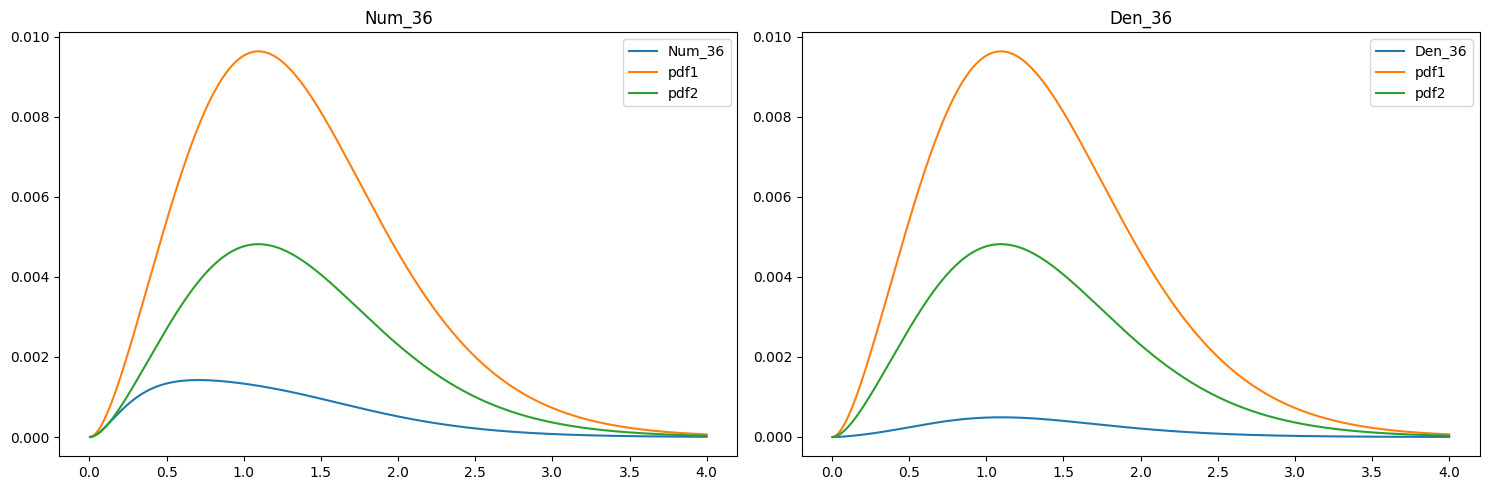

In [198]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_36_2d, Den_36_2d]
titles = ['Num_36', 'Den_36']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [199]:
def Num36(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_36_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den36(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_36_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [200]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_36 = monte_carlo_integration(samples_p1, p1, Num36, Den36)[0]
E_p2_36 = monte_carlo_integration(samples_p2, p2, Num36, Den36)[0]
Den_36_p1 = monte_carlo_integration(samples_p1, p1, Num36, Den36)[2]
Den_36_p2 = monte_carlo_integration(samples_p2, p2, Num36, Den36)[2]

print(f"Estimated E using P1: {E_p1_36}")
print(f"Denominator using P1: {Den_36_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_36}")
print(f"Denominator using P2: {Den_36_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.475706506042772
Denominator using P1: 0.03417768491691143
Number of Samples Collected: 90000
Number of Samples Accepted: 75699
Fraction Acceptances: 0.75699

Estimated E using P2: -2.4733100662326586
Denominator using P2: 0.08414085997138346
Number of Samples Collected: 90000
Number of Samples Accepted: 52180
Fraction Acceptances: 0.5218



In [201]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_36 = u3_p1*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_36 = u3_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_36_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_36)
S_p2_36_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_36)

In [202]:
def S36_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_36_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S36_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_36_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [203]:
S_36_p1 = MCI(samples_p1, p1, S36_p1)
S_36_p2 = MCI(samples_p2, p2, S36_p2)

print(f"Estimated S36 using P1: {S_36_p1}")
print(f"Estimated S36 using P2: {S_36_p2}")

Estimated S36 using P1: 0.09081727482411278
Estimated S36 using P2: 0.19245636739684924


## H_37

In [204]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_37 = (Phi_3 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_37 = (Phi_3*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [205]:
Num_37_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_37, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_37_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_37)

In [206]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [207]:
Num_37_2d = Num_37_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_37_2d = Den_37_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-93>:2: RuntimeWarning: invalid value encountered in divide
  return sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1 + r2)*(cos(phi1 - phi2)/abs(r1*r2) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)/(sqrt(-2*

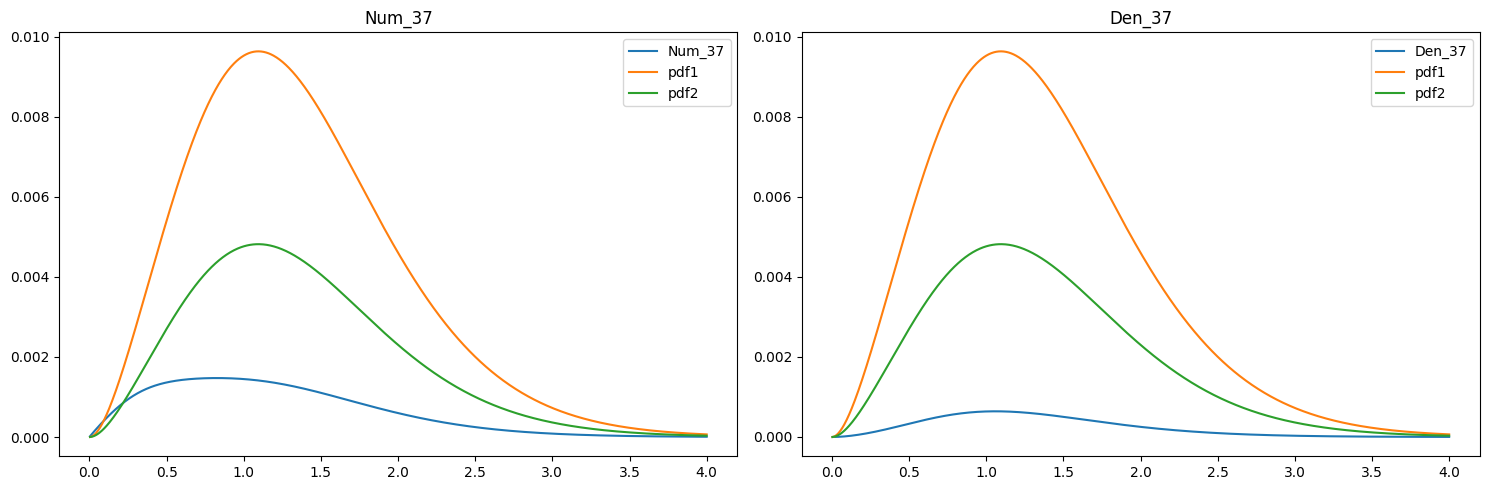

In [208]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_37_2d, Den_37_2d]
titles = ['Num_37', 'Den_37']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [209]:
def Num37(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_37_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den37(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_37_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [210]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_37 = monte_carlo_integration(samples_p1, p1, Num37, Den37)[0]
E_p2_37 = monte_carlo_integration(samples_p2, p2, Num37, Den37)[0]
Den_p1_37 = monte_carlo_integration(samples_p1, p1, Num37, Den37)[2]
Den_p2_37 = monte_carlo_integration(samples_p2, p2, Num37, Den37)[2]

print(f"Estimated E using P1: {E_p1_37}")
print(f"Denominator using P1: {Den_p1_37}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_37}")
print(f"Denominator using P2: {Den_p2_37}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.549355185144465
Denominator using P1: 0.04130914731095024
Number of Samples Collected: 90000
Number of Samples Accepted: 75574
Fraction Acceptances: 0.75574

Estimated E using P2: -2.550683632012348
Denominator using P2: 0.10322441971482131
Number of Samples Collected: 90000
Number of Samples Accepted: 52188
Fraction Acceptances: 0.52188



In [211]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_37 = u3_p1*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_37 = u3_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_37_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_37)
S_p2_37_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_37)

In [212]:
def S37_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_37_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S37_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_37_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [213]:
S_37_p1 = MCI(samples_p1, p1, S37_p1)
S_37_p2 = MCI(samples_p2, p2, S37_p2)

print(f"Estimated S37 using P1: {S_37_p1}")
print(f"Estimated S37 using P2: {S_37_p2}")

Estimated S37 using P1: 0.06095926589160993
Estimated S37 using P2: 0.16383424165282623


## H_44

In [214]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_44 = (Phi_4 * H_Phi4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_44 = (Phi_4*Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [215]:
Num_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_44)
Den_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_44)

In [216]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [217]:
Num_44_2d = Num_44_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_44_2d = Den_44_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-97>:2: RuntimeWarning: invalid value encountered in divide
  return r1**3*r2**3*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r1*exp(-2*r1 - 2*r2))/r2 - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r2*exp(-2*r1 - 2*r2))/r1)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-97>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**3*r2**3*(1.0*r1*r2*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 2.0*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2.0*r1*exp(-2*r1 - 2*r2) - 2.0*r2*(r1 - 1)*exp(-2*r1 - 2*r2) - 2.0*r2*exp(-2*r1 - 2*r2) - 1.0*(-2*r1*r2*exp(-2*r1 - 2*r2) + r1*exp(-2*

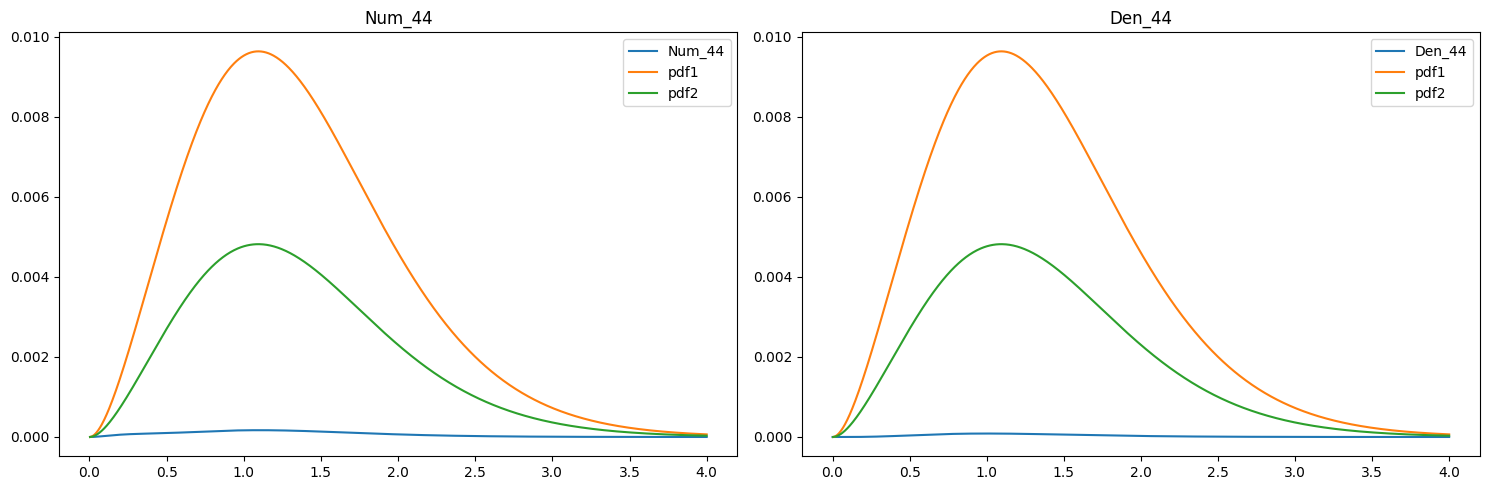

In [218]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_44_2d, Den_44_2d]
titles = ['Num_44', 'Den_44']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [219]:
def Num44(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_44_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den44(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_44_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [220]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_44 = monte_carlo_integration(samples_p1, p1, Num44, Den44)[0]
E_p2_44 = monte_carlo_integration(samples_p2, p2, Num44, Den44)[0]
Den_44_p1 = monte_carlo_integration(samples_p1, p1, Num44, Den44)[2]
Den_44_p2 = monte_carlo_integration(samples_p2, p2, Num44, Den44)[2]

print(f"Estimated E using P1: {E_p1_44}")
print(f"Denominator using P1: {Den_44_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_44}")
print(f"Denominator using P2: {Den_44_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -1.9092878696356494
Denominator using P1: 0.007922127001005537
Number of Samples Collected: 90000
Number of Samples Accepted: 75552
Fraction Acceptances: 0.75552

Estimated E using P2: -1.8866545249455435
Denominator using P2: 0.019774592522183883
Number of Samples Collected: 90000
Number of Samples Accepted: 52012
Fraction Acceptances: 0.52012



In [221]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_4*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u1_p1*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I1_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [222]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_4*u2_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u2_p1*u2_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I2_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [223]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_4*u3_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u3_p1*u3_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I3_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [224]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_4*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u1_p2*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I1_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [225]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_4*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u2_p2*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I2_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [226]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_4*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u3_p2*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I3_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [227]:
u4_p1 = Phi_4 - (I3_p1 * u3_p1) - (I2_p1 * u2_p1) - (I1_p1 * u1_p1)
u4_p2 = Phi_4 - (I3_p2 * u3_p2) - (I2_p2 * u2_p2) - (I1_p2 * u1_p2)

In [228]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p1 = u4_p1*u4_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm__p2 = u4_p2*u4_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Norm_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p1)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I1 = MCI(samples_p1, p1, Norm_p1)
I2 = MCI(samples_p2, p2, Norm_p2)

In [229]:
u4_p1 = u4_p1 / np.sqrt(I1)
u4_p2 = u4_p2 / np.sqrt(I2)

In [230]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_41 = u4_p1*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_41 = u4_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_42 = u4_p1*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_42 = u4_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_43 = u4_p1*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_43 = u4_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_44 = u4_p1*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_44 = u4_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_41_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_41)
S_p2_41_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_41)
S_p1_42_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_42)
S_p2_42_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_42)
S_p1_43_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_43)
S_p2_43_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_43)
S_p1_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_44)
S_p2_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_44)

In [231]:
def S41_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_41_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S41_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_41_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S42_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_42_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S42_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_42_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S43_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_43_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S43_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_43_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S44_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_44_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S44_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_44_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [232]:
S_41_p1 = MCI(samples_p1, p1, S41_p1)
S_41_p2 = MCI(samples_p2, p2, S41_p2)

S_42_p1 = MCI(samples_p1, p1, S42_p1)
S_42_p2 = MCI(samples_p2, p2, S42_p2)

S_43_p1 = MCI(samples_p1, p1, S43_p1)
S_43_p2 = MCI(samples_p2, p2, S43_p2)

S_44_p1 = MCI(samples_p1, p1, S44_p1)
S_44_p2 = MCI(samples_p2, p2, S44_p2)

print(f"Estimated S41 using P1: {S_41_p1}")
print(f"Estimated S41 using P2: {S_41_p2}")
print(f"Estimated S42 using P1: {S_42_p1}")
print(f"Estimated S42 using P2: {S_42_p2}")
print(f"Estimated S43 using P1: {S_43_p1}")
print(f"Estimated S43 using P2: {S_43_p1}")
print(f"Estimated S44 using P1: {S_44_p1}")
print(f"Estimated S44 using P2: {S_44_p2}")

Estimated S41 using P1: -0.01106590909450214
Estimated S41 using P2: 0.03443710125471606
Estimated S42 using P1: -0.020940882452418916
Estimated S42 using P2: 0.07362360567730748
Estimated S43 using P1: -0.0077110609854977585
Estimated S43 using P2: -0.0077110609854977585
Estimated S44 using P1: 0.009549416827062384
Estimated S44 using P2: 0.06820776720567648


## H_45

In [233]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_45 = (Phi_4 * H_Phi5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_45 = (Phi_4*Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [234]:
Num_45_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_45)
Den_45_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_45)

In [235]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [236]:
Num_45_2d = Num_45_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_45_2d = Den_45_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-121>:2: RuntimeWarning: invalid value encountered in divide
  return r1**3*r2**3*(-(r1 + r2)**2*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r2) - 4*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2))) + 2*r2*(-2*(r1 + r2)**2*exp(-2*r1 - 2*r2) + (2*r1 + 2*r2)*exp(-2*r1 - 2*r2)))/r2**2 - 0.5*(2*r1**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r2) - 4*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2))) + 2*r1*(-2*(r1 + r2)**2*exp(-2*r1 - 2*r2) + (2*r1 + 2*r2)*exp(-2*r1 - 2*r2)))/r1**2)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-121>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**3*r2**3*(-(r1 + r2)**2*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r

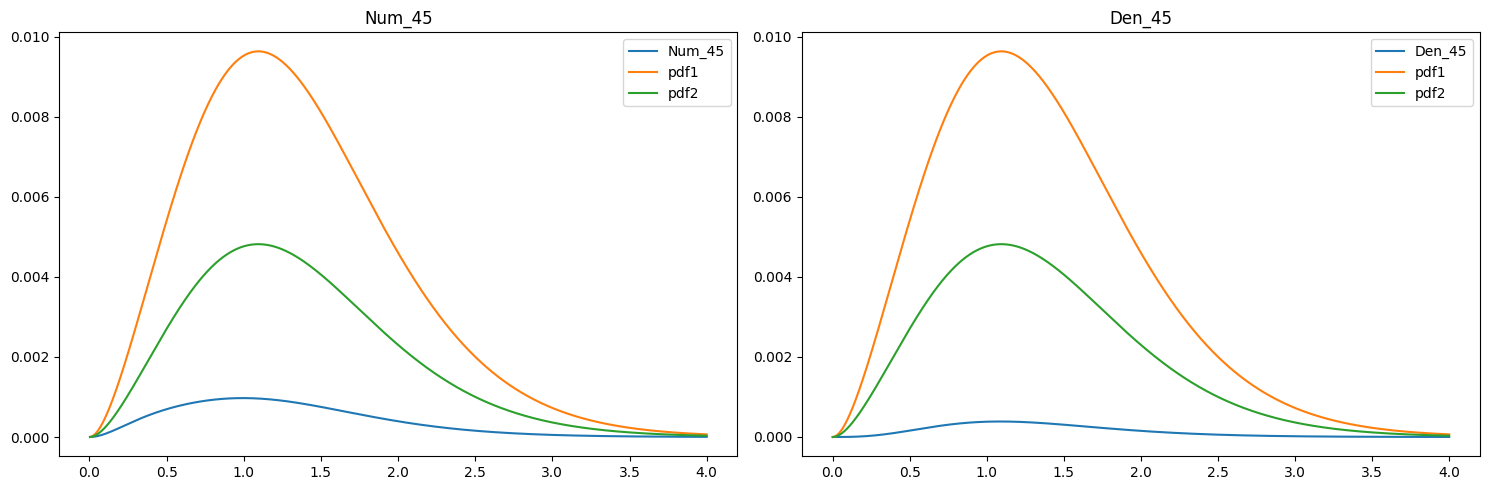

In [237]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_45_2d, Den_45_2d]
titles = ['Num_45', 'Den_45']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [238]:
def Num45(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_45_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den45(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_45_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [239]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_45 = monte_carlo_integration(samples_p1, p1, Num45, Den45)[0]
E_p2_45 = monte_carlo_integration(samples_p2, p2, Num45, Den45)[0]
Den_45_p1 = monte_carlo_integration(samples_p1, p1, Num45, Den45)[2]
Den_45_p2 = monte_carlo_integration(samples_p2, p2, Num45, Den45)[2]

print(f"Estimated E using P1: {E_p1_45}")
print(f"Denominator using P1: {Den_45_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_45}")
print(f"Denominator using P2: {Den_45_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.2353719049855267
Denominator using P1: 0.03562693564819022
Number of Samples Collected: 90000
Number of Samples Accepted: 75317
Fraction Acceptances: 0.75317

Estimated E using P2: -2.219371220868918
Denominator using P2: 0.08824477468243037
Number of Samples Collected: 90000
Number of Samples Accepted: 52190
Fraction Acceptances: 0.5219



In [240]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_45 = u4_p1*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_45 = u4_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_45_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_45)
S_p2_45_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_45)

In [241]:
def S45_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_45_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S45_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_45_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [242]:
S_45_p1 = MCI(samples_p1, p1, S45_p1)
S_45_p2 = MCI(samples_p2, p2, S45_p2)

print(f"Estimated S45 using P1: {S_45_p1}")
print(f"Estimated S45 using P2: {S_45_p2}")

Estimated S45 using P1: -0.013949560490859022
Estimated S45 using P2: 0.2070939172477461


## H_46

In [243]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_46 = (Phi_4 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_46 = (Phi_4*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [244]:
Num_46_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_46, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_46_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_46)

In [245]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [246]:
Num_46_2d = Num_46_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_46_2d = Den_46_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-125>:2: RuntimeWarning: invalid value encountered in divide
  return r1**3*r2**3*(-1.0*r1**2*exp(-2*r1 - 2*r2)*sin(theta1)*cos(phi1 - phi2)/(sin(theta2)*abs(r1*r2)) - 1.0*r2**2*exp(-2*r1 - 2*r2)*sin(theta2)*cos(phi1 - phi2)/(sin(theta1)*abs(r1*r2)) - (-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2)*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(-4*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 8*r1**2*r2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*DiracDelta(r1*r2) - 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 2*r1**2 - 4*r1*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)

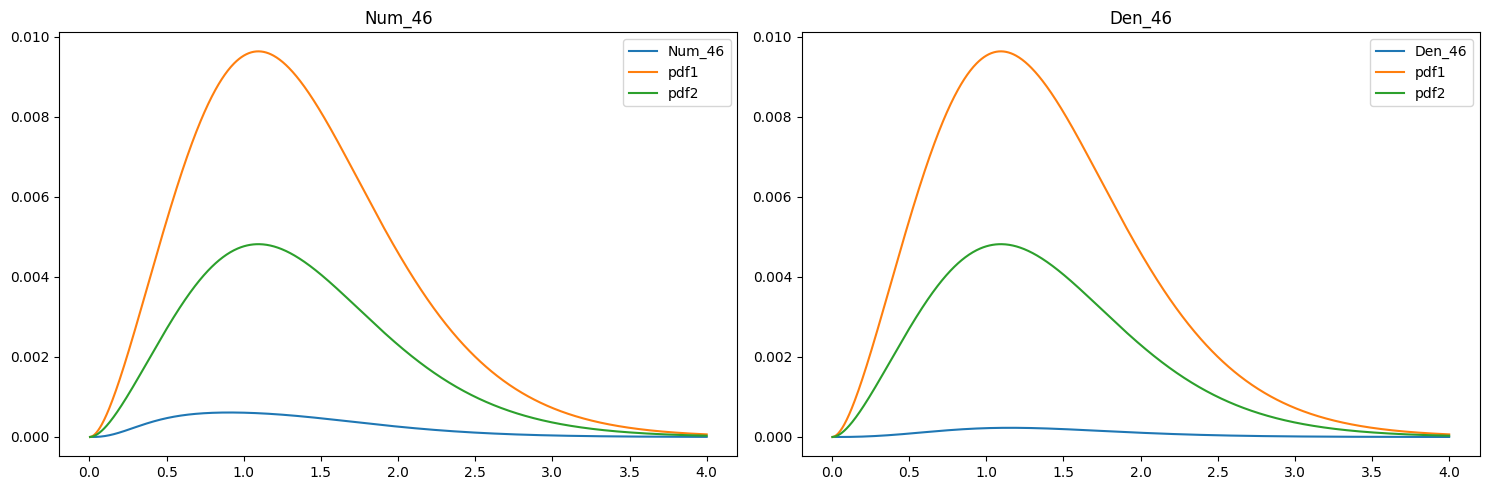

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_46_2d, Den_46_2d]
titles = ['Num_46', 'Den_46']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [248]:
def Num46(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_46_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den46(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_46_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [249]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_46 = monte_carlo_integration(samples_p1, p1, Num46, Den46)[0]
E_p2_46 = monte_carlo_integration(samples_p2, p2, Num46, Den46)[0]
Den_46_p1 = monte_carlo_integration(samples_p1, p1, Num46, Den46)[2]
Den_46_p2 = monte_carlo_integration(samples_p2, p2, Num46, Den46)[2]

print(f"Estimated E using P1: {E_p1_46}")
print(f"Denominator using P1: {Den_46_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_46}")
print(f"Denominator using P2: {Den_46_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.611061828583567
Denominator using P1: 0.019941582275119704
Number of Samples Collected: 90000
Number of Samples Accepted: 75537
Fraction Acceptances: 0.75537

Estimated E using P2: -2.6233975047713183
Denominator using P2: 0.049035516246800456
Number of Samples Collected: 90000
Number of Samples Accepted: 51961
Fraction Acceptances: 0.51961



In [250]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_46 = u4_p1*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_46 = u4_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_46_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_46)
S_p2_46_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_46)

In [251]:
def S46_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_46_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S46_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_46_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [252]:
S_46_p1 = MCI(samples_p1, p1, S46_p1)
S_46_p2 = MCI(samples_p2, p2, S46_p2)

print(f"Estimated S46 using P1: {S_46_p1}")
print(f"Estimated S46 using P2: {S_46_p2}")

Estimated S46 using P1: 0.016021888307883154
Estimated S46 using P2: 0.06935009797642332


## H_47

In [253]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_47 = (Phi_4 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_47 = (Phi_4*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [254]:
Num_47_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_47, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_47_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_47)

In [255]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [256]:
Num_47_2d = Num_47_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_47_2d = Den_47_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-129>:2: RuntimeWarning: divide by zero encountered in divide
  return r1*r2*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1 + r2)*(cos(phi1 - phi2)/abs(r1*r2) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) +

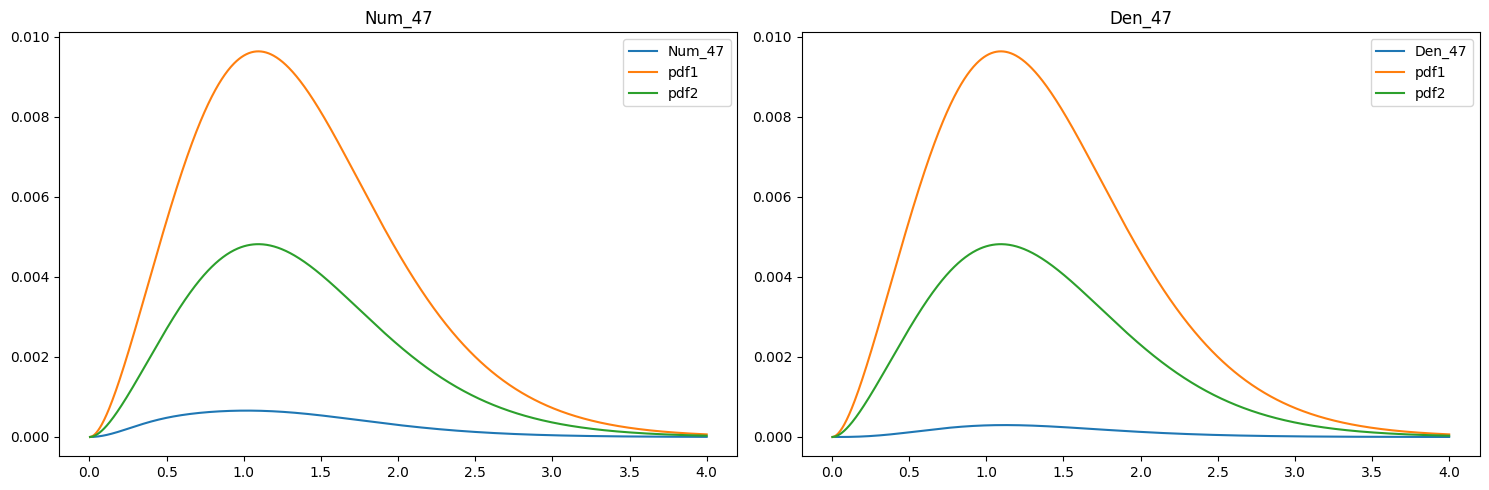

In [257]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_47_2d, Den_47_2d]
titles = ['Num_47', 'Den_47']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [258]:
def Num47(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_47_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den47(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_47_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [259]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_47 = monte_carlo_integration(samples_p1, p1, Num47, Den47)[0]
E_p2_47 = monte_carlo_integration(samples_p2, p2, Num47, Den47)[0]
Den_47_p1 = monte_carlo_integration(samples_p1, p1, Num47, Den47)[2]
Den_47_p2 = monte_carlo_integration(samples_p2, p2, Num47, Den47)[2]

print(f"Estimated E using P1: {E_p1_47}")
print(f"Denominator using P1: {Den_47_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_47}")
print(f"Denominator using P2: {Den_47_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.459700693196113
Denominator using P1: 0.025390710568467603
Number of Samples Collected: 90000
Number of Samples Accepted: 75293
Fraction Acceptances: 0.75293

Estimated E using P2: -2.4421412614322984
Denominator using P2: 0.06370391043314451
Number of Samples Collected: 90000
Number of Samples Accepted: 51961
Fraction Acceptances: 0.51961



In [260]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_47 = u4_p1*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_47 = u4_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_47_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_47)
S_p2_47_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_47)

In [261]:
def S47_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_47_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S47_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_47_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [262]:
S_47_p1 = MCI(samples_p1, p1, S47_p1)
S_47_p2 = MCI(samples_p2, p2, S47_p2)

print(f"Estimated S47 using P1: {S_47_p1}")
print(f"Estimated S47 using P2: {S_47_p2}")

Estimated S47 using P1: 0.006960438859691607
Estimated S47 using P2: 0.11501013251170453


## H_55

In [263]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_55 = (Phi_5 * H_Phi5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_55 = (Phi_5*Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [264]:
Num_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_55)
Den_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_55)

In [265]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [266]:
Num_55_2d = Num_55_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_55_2d = Den_55_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-133>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(r1 + r2)**2*(-(r1 + r2)**2*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r2) - 4*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2))) + 2*r2*(-2*(r1 + r2)**2*exp(-2*r1 - 2*r2) + (2*r1 + 2*r2)*exp(-2*r1 - 2*r2)))/r2**2 - 0.5*(2*r1**2*(2*(r1 + r2)**2*exp(-2*r1 - 2*r2) - 4*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*(r1 + r2))) + 2*r1*(-2*(r1 + r2)**2*exp(-2*r1 - 2*r2) + (2*r1 + 2*r2)*exp(-2*r1 - 2*r2)))/r1**2)*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-133>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(r1 + r2)**2*(-(r1 + r2)**2*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(2*(r

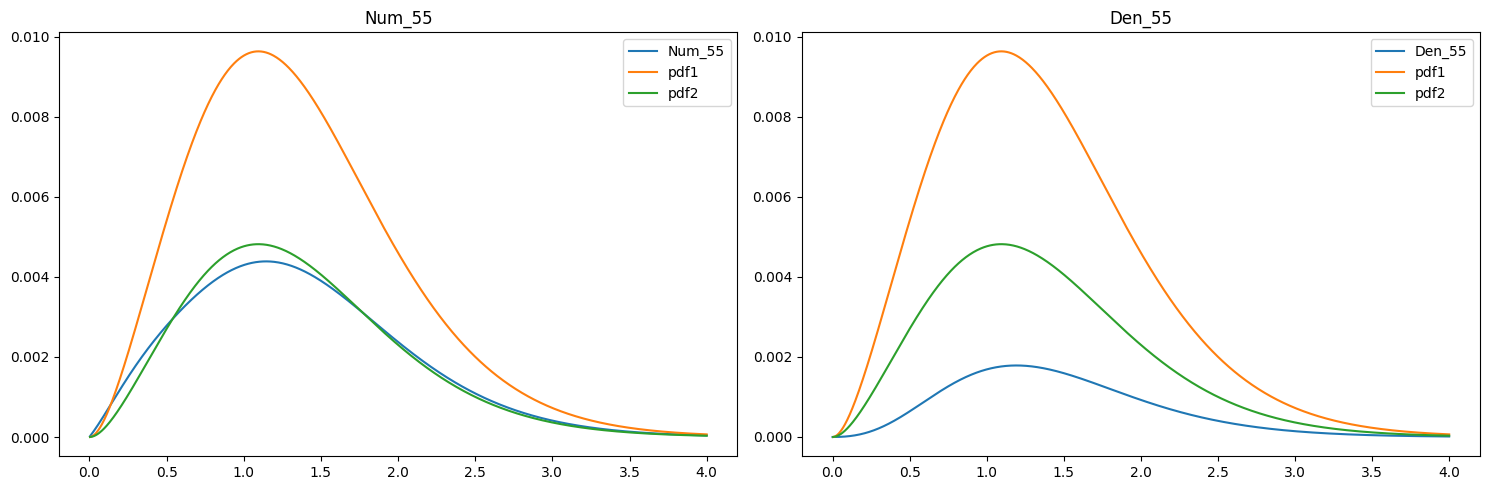

In [267]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_55_2d, Den_55_2d]
titles = ['Num_55', 'Den_55']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [268]:
def Num55(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_55_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den55(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_55_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [269]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_55 = monte_carlo_integration(samples_p1, p1, Num55, Den55)[0]
E_p2_55 = monte_carlo_integration(samples_p2, p2, Num55, Den55)[0]
Den_55_p1 = monte_carlo_integration(samples_p1, p1, Num55, Den55)[2]
Den_55_p2 = monte_carlo_integration(samples_p2, p2, Num55, Den55)[2]

print(f"Estimated E using P1: {E_p1_55}")
print(f"Denominator using P1: {Den_55_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_55}")
print(f"Denominator using P2: {Den_55_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.3577908075381853
Denominator using P1: 0.16546972753507486
Number of Samples Collected: 90000
Number of Samples Accepted: 75333
Fraction Acceptances: 0.75333

Estimated E using P2: -2.370029974123838
Denominator using P2: 0.4070011388592439
Number of Samples Collected: 90000
Number of Samples Accepted: 52156
Fraction Acceptances: 0.52156



In [270]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_5*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u1_p1*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I1_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [271]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_5*u2_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u2_p1*u2_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I2_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [272]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_5*u3_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u3_p1*u3_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I3_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [273]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_5*u4_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u4_p1*u4_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I4_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [274]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_5*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u1_p2*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I1_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [275]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_5*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u2_p2*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I2_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [276]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_5*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u3_p2*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I3_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [277]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_5*u4_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u4_p2*u4_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I4_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [278]:
u5_p1 = Phi_5 - (I1_p1 * u1_p1) - (I2_p1 * u2_p1) - (I3_p1 * u3_p1) - (I4_p1 * u4_p1)
u5_p2 = Phi_5 - (I1_p2 * u1_p2) - (I2_p2 * u2_p2) - (I3_p2 * u3_p2) - (I4_p2 * u4_p2)

In [279]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p1 = u5_p1*u5_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm__p2 = u5_p2*u5_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Norm_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p1)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I1 = MCI(samples_p1, p1, Norm_p1)
I2 = MCI(samples_p2, p2, Norm_p2)

In [280]:
u5_p1 = u5_p1 / np.sqrt(I1)
u5_p2 = u5_p2 / np.sqrt(I2)

In [281]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_51 = u5_p1*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_51 = u5_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_52 = u5_p1*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_52 = u5_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_53 = u5_p1*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_53 = u5_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_54 = u5_p1*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_54 = u5_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_55 = u5_p1*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_55 = u5_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_51_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_51)
S_p2_51_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_51)
S_p1_52_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_52)
S_p2_52_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_52)
S_p1_53_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_53)
S_p2_53_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_53)
S_p1_54_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_54)
S_p2_54_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_54)
S_p1_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_55)
S_p2_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_55)

In [282]:
def S51_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_51_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S51_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_51_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S52_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_52_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S52_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_52_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S53_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_53_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S53_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_53_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S54_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_54_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S54_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_54_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S55_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_55_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S55_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_55_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [283]:
S_51_p1 = MCI(samples_p1, p1, S51_p1)
S_51_p2 = MCI(samples_p2, p2, S51_p2)

S_52_p1 = MCI(samples_p1, p1, S52_p1)
S_52_p2 = MCI(samples_p2, p2, S52_p2)

S_53_p1 = MCI(samples_p1, p1, S53_p1)
S_53_p2 = MCI(samples_p2, p2, S53_p2)

S_54_p1 = MCI(samples_p1, p1, S54_p1)
S_54_p2 = MCI(samples_p2, p2, S54_p2)

S_55_p1 = MCI(samples_p1, p1, S55_p1)
S_55_p2 = MCI(samples_p2, p2, S55_p2)

In [284]:
print(f"Estimated S51 using P1: {S_51_p1}")
print(f"Estimated S51 using P2: {S_51_p2}")
print(f"Estimated S52 using P1: {S_52_p1}")
print(f"Estimated S52 using P2: {S_52_p2}")
print(f"Estimated S53 using P1: {S_53_p1}")
print(f"Estimated S53 using P2: {S_53_p2}")
print(f"Estimated S54 using P1: {S_54_p1}")
print(f"Estimated S54 using P2: {S_54_p2}")
print(f"Estimated S55 using P1: {S_55_p1}")
print(f"Estimated S55 using P2: {S_55_p2}")

Estimated S51 using P1: -0.008392067275445328
Estimated S51 using P2: -0.02593845826111711
Estimated S52 using P1: -0.033584401188192586
Estimated S52 using P2: -0.0457982714396503
Estimated S53 using P1: -0.015653370913613802
Estimated S53 using P2: -0.03346912662129148
Estimated S54 using P1: -0.008080352875294365
Estimated S54 using P2: -0.048359521951870606
Estimated S55 using P1: -0.035993456595193055
Estimated S55 using P2: -0.11510886943768094


## H_56

In [285]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_56 = (Phi_5 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_56 = (Phi_5*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [286]:
Num_56_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_56, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_56_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_56)

In [287]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [288]:
Num_56_2d = Num_56_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_56_2d = Den_56_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-163>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(r1 + r2)**2*(-1.0*r1**2*exp(-2*r1 - 2*r2)*sin(theta1)*cos(phi1 - phi2)/(sin(theta2)*abs(r1*r2)) - 1.0*r2**2*exp(-2*r1 - 2*r2)*sin(theta2)*cos(phi1 - phi2)/(sin(theta1)*abs(r1*r2)) - (-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2)*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(-4*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 8*r1**2*r2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*DiracDelta(r1*r2) - 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 2*r1**2 - 4*r1*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) 

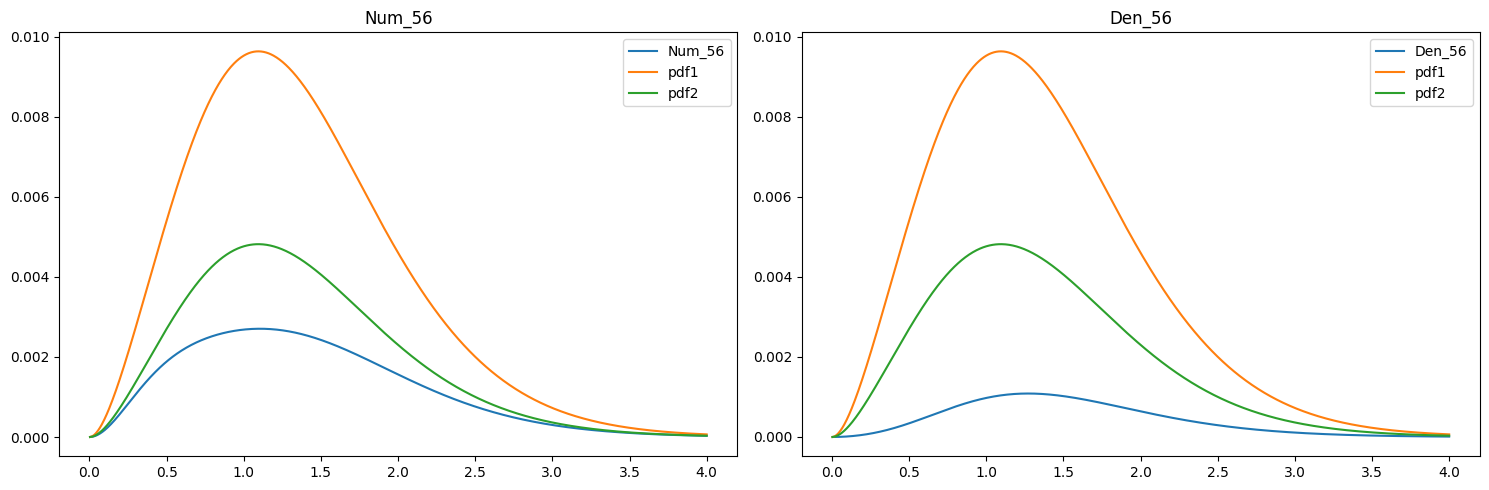

In [289]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_56_2d, Den_56_2d]
titles = ['Num_56', 'Den_56']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [290]:
def Num56(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_56_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den56(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_56_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [291]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_56 = monte_carlo_integration(samples_p1, p1, Num56, Den56)[0]
E_p2_56 = monte_carlo_integration(samples_p2, p2, Num56, Den56)[0]
Den_56_p1 = monte_carlo_integration(samples_p1, p1, Num56, Den56)[2]
Den_56_p2 = monte_carlo_integration(samples_p2, p2, Num56, Den56)[2]

print(f"Estimated E using P1: {E_p1_56}")
print(f"Denominator using P1: {Den_56_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_56}")
print(f"Denominator using P2: {Den_56_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.634717387902321
Denominator using P1: 0.09410906051840913
Number of Samples Collected: 90000
Number of Samples Accepted: 75360
Fraction Acceptances: 0.7536

Estimated E using P2: -2.6171055512847805
Denominator using P2: 0.23460630675094685
Number of Samples Collected: 90000
Number of Samples Accepted: 52110
Fraction Acceptances: 0.5211



In [292]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_56 = u5_p1*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_56 = u5_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_56_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_56)
S_p2_56_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_56)

In [293]:
def S56_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_56_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S56_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_56_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [294]:
S_56_p1 = MCI(samples_p1, p1, S56_p1)
S_56_p2 = MCI(samples_p2, p2, S56_p2)

print(f"Estimated S56 using P1: {S_56_p1}")
print(f"Estimated S56 using P2: {S_56_p2}")

Estimated S56 using P1: 0.004848969630875715
Estimated S56 using P2: -0.05937433327008806


## H_57

In [295]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_57 = (Phi_5 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_57 = (Phi_5*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [296]:
Num_57_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_57, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_57_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_57)

In [297]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [298]:
Num_57_2d = Num_57_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_57_2d = Den_57_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-167>:2: RuntimeWarning: divide by zero encountered in divide
  return (r1 + r2)**2*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1 + r2)*(cos(phi1 - phi2)/abs(r1*r2) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r

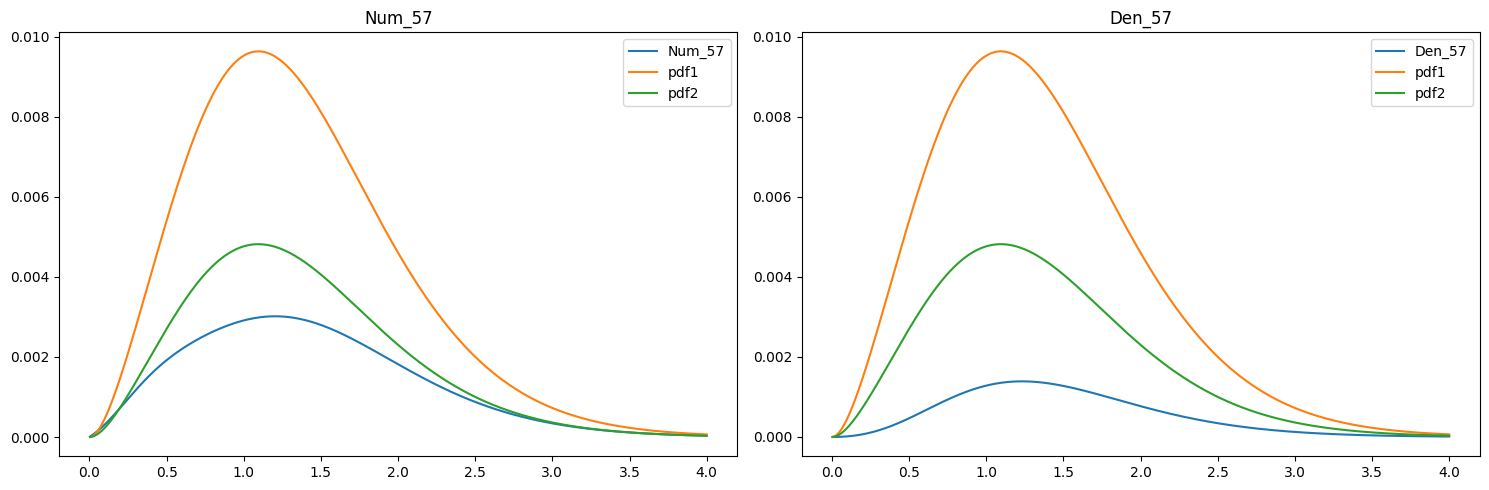

In [299]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_57_2d, Den_57_2d]
titles = ['Num_57', 'Den_57']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [300]:
def Num57(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_57_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den57(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_57_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [301]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_57 = monte_carlo_integration(samples_p1, p1, Num57, Den57)[0]
E_p2_57 = monte_carlo_integration(samples_p2, p2, Num57, Den57)[0]
Den_57_p1 = monte_carlo_integration(samples_p1, p1, Num57, Den57)[2]
Den_57_p2 = monte_carlo_integration(samples_p2, p2, Num57, Den57)[2]

print(f"Estimated E using P1: {E_p1_57}")
print(f"Denominator using P1: {Den_57_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_57}")
print(f"Denominator using P2: {Den_57_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.531856299047536
Denominator using P1: 0.12000087683695888
Number of Samples Collected: 90000
Number of Samples Accepted: 75601
Fraction Acceptances: 0.75601

Estimated E using P2: -2.5338900347910993
Denominator using P2: 0.29874170467638467
Number of Samples Collected: 90000
Number of Samples Accepted: 52157
Fraction Acceptances: 0.52157



In [302]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_57 = u5_p1*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_57 = u5_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_57_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_57)
S_p2_57_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_57)

In [303]:
def S57_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_57_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S57_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_57_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [304]:
S_57_p1 = MCI(samples_p1, p1, S57_p1)
S_57_p2 = MCI(samples_p2, p2, S57_p2)

print(f"Estimated S57 using P1: {S_57_p1}")
print(f"Estimated S57 using P2: {S_57_p2}")

Estimated S57 using P1: -0.012689382365600846
Estimated S57 using P2: -0.0669189536986906


## H_66

In [305]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_66 = (Phi_6 * H_Phi6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_66 = (Phi_6*Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [306]:
Num_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_66, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_66)

In [307]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [308]:
Num_66_2d = Num_66_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_66_2d = Den_66_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-171>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)*(-1.0*r1**2*exp(-2*r1 - 2*r2)*sin(theta1)*cos(phi1 - phi2)/(sin(theta2)*abs(r1*r2)) - 1.0*r2**2*exp(-2*r1 - 2*r2)*sin(theta2)*cos(phi1 - phi2)/(sin(theta1)*abs(r1*r2)) - (-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2)*(-1/sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + r1**2 + r2**2) + 2/r2 + 2/r1)*exp(-2*r1 - 2*r2) - 0.5*(2*r2**2*(-4*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 8*r1**2*r2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))*DiracDelta(r1*r2) - 2*r1**2*(sin(theta1)*sin(theta2)*cos(phi

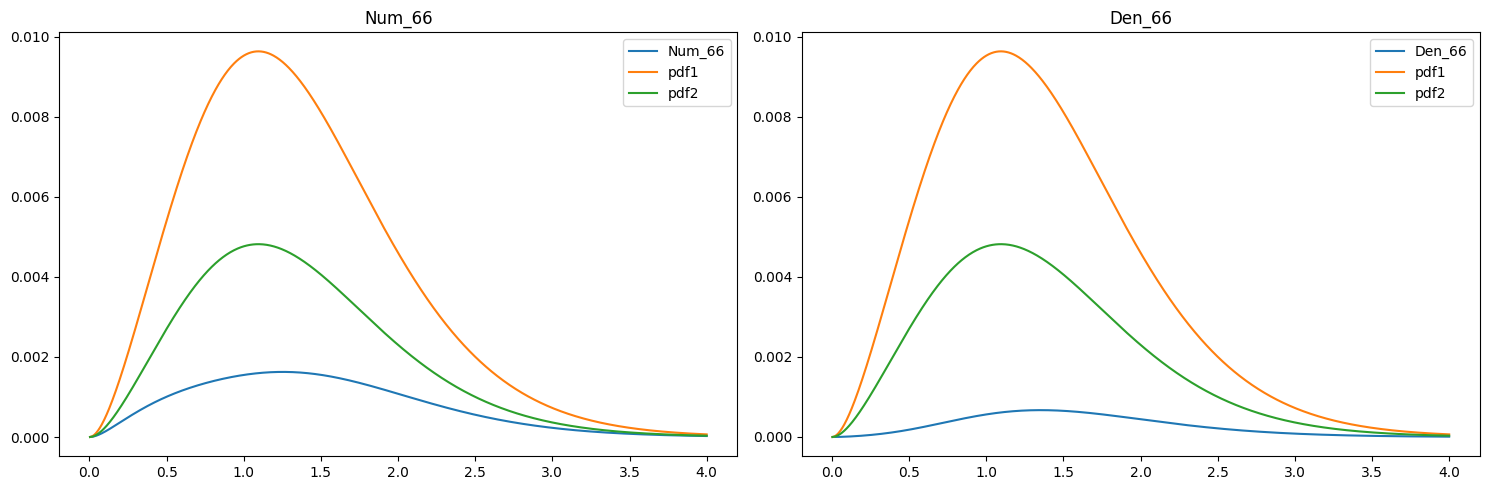

In [309]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_66_2d, Den_66_2d]
titles = ['Num_66', 'Den_66']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [310]:
def Num66(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_66_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den66(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_66_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [311]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_66 = monte_carlo_integration(samples_p1, p1, Num66, Den66)[0]
E_p2_66 = monte_carlo_integration(samples_p2, p2, Num66, Den66)[0]
Den_66_p1 = monte_carlo_integration(samples_p1, p1, Num66, Den66)[2]
Den_66_p2 = monte_carlo_integration(samples_p2, p2, Num66, Den66)[2]

print(f"Estimated E using P1: {E_p1_66}")
print(f"Denominator using P1: {Den_66_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_66}")
print(f"Denominator using P2: {Den_66_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.177010627925399
Denominator using P1: 0.06576474179759674
Number of Samples Collected: 90000
Number of Samples Accepted: 75765
Fraction Acceptances: 0.75765

Estimated E using P2: -2.168617748556035
Denominator using P2: 0.15950334776977926
Number of Samples Collected: 90000
Number of Samples Accepted: 51945
Fraction Acceptances: 0.51945



In [312]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_6*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u1_p1*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I1_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [313]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_6*u2_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u2_p1*u2_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I2_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [314]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_6*u3_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u3_p1*u3_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I3_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [315]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_6*u4_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u4_p1*u4_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I4_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [316]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_6*u5_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u5_p1*u5_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I5_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [317]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_6*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u1_p2*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I1_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [318]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_6*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u2_p2*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I2_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [319]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_6*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u3_p2*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I3_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [320]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_6*u4_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u4_p2*u4_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I4_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [321]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_6*u5_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u5_p2*u5_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I5_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [322]:
u6_p1 = Phi_6 - (I1_p1 * u1_p1) - (I2_p1 * u2_p1) - (I3_p1 * u3_p1) - (I4_p1 * u4_p1) - (I5_p1 * u5_p1)
u6_p2 = Phi_6 - (I1_p2 * u1_p2) - (I2_p2 * u2_p2) - (I3_p2 * u3_p2) - (I4_p2 * u4_p2) - (I5_p2 * u5_p2)

In [323]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p1 = u6_p1*u6_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm__p2 = u6_p2*u6_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Norm_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p1)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I1 = MCI(samples_p1, p1, Norm_p1)
I2 = MCI(samples_p2, p2, Norm_p2)

In [324]:
u6_p1 = u6_p1 / np.sqrt(I1)
u6_p2 = u6_p2 / np.sqrt(I2)

In [325]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_61 = u6_p1*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_61 = u6_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_62 = u6_p1*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_62 = u6_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_63 = u6_p1*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_63 = u6_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_64 = u6_p1*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_64 = u6_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_65 = u6_p1*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_65 = u6_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_66 = u6_p1*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_66 = u6_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_61_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_61)
S_p2_61_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_61)
S_p1_62_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_62)
S_p2_62_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_62)
S_p1_63_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_63)
S_p2_63_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_63)
S_p1_64_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_64)
S_p2_64_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_64)
S_p1_65_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_65)
S_p2_65_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_65)
S_p1_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_66)
S_p2_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_66)

In [326]:
def S61_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_61_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S61_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_61_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S62_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_62_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S62_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_62_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S63_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_63_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S63_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_63_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S64_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_64_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S64_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_64_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S65_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_65_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S65_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_65_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S66_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_66_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S66_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_66_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [327]:
S_61_p1 = MCI(samples_p1, p1, S61_p1)
S_61_p2 = MCI(samples_p2, p2, S61_p2)

S_62_p1 = MCI(samples_p1, p1, S62_p1)
S_62_p2 = MCI(samples_p2, p2, S62_p2)

S_63_p1 = MCI(samples_p1, p1, S63_p1)
S_63_p2 = MCI(samples_p2, p2, S63_p2)

S_64_p1 = MCI(samples_p1, p1, S64_p1)
S_64_p2 = MCI(samples_p2, p2, S64_p2)

S_65_p1 = MCI(samples_p1, p1, S65_p1)
S_65_p2 = MCI(samples_p2, p2, S65_p2)

S_66_p1 = MCI(samples_p1, p1, S66_p1)
S_66_p2 = MCI(samples_p2, p2, S66_p2)

In [328]:
print(f"Estimated S61 using P1: {S_61_p1}")
print(f"Estimated S61 using P2: {S_61_p2}")

print(f"Estimated S62 using P1: {S_62_p1}")
print(f"Estimated S62 using P2: {S_62_p2}")

print(f"Estimated S63 using P1: {S_63_p1}")
print(f"Estimated S63 using P2: {S_63_p2}")

print(f"Estimated S64 using P1: {S_64_p1}")
print(f"Estimated S64 using P2: {S_64_p2}")

print(f"Estimated S65 using P1: {S_65_p1}")
print(f"Estimated S65 using P2: {S_65_p2}")

print(f"Estimated S66 using P1: {S_66_p1}")
print(f"Estimated S66 using P2: {S_66_p2}")

Estimated S61 using P1: -0.003939528170562703
Estimated S61 using P2: -0.03213569495532016
Estimated S62 using P1: 0.005825508576933147
Estimated S62 using P2: -0.05843022367944746
Estimated S63 using P1: 0.010458556358428088
Estimated S63 using P2: -0.04565665027456669
Estimated S64 using P1: 0.008682351800023209
Estimated S64 using P2: -0.045014585967445876
Estimated S65 using P1: 0.06652855523390616
Estimated S65 using P2: -0.11480380467845767
Estimated S66 using P1: 0.08462000812474271
Estimated S66 using P2: -0.0387127452751173


## H_67

In [329]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_67 = (Phi_6 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_67 = (Phi_6*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [330]:
Num_67_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_67, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_67_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_67)

In [331]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [332]:
Num_67_2d = Num_67_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_67_2d = Den_67_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-207>:2: RuntimeWarning: invalid value encountered in divide
  return (-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1 + r2)*(cos(phi1 - phi2)/abs(r1*r2) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1)/(sqrt(-2*r1*

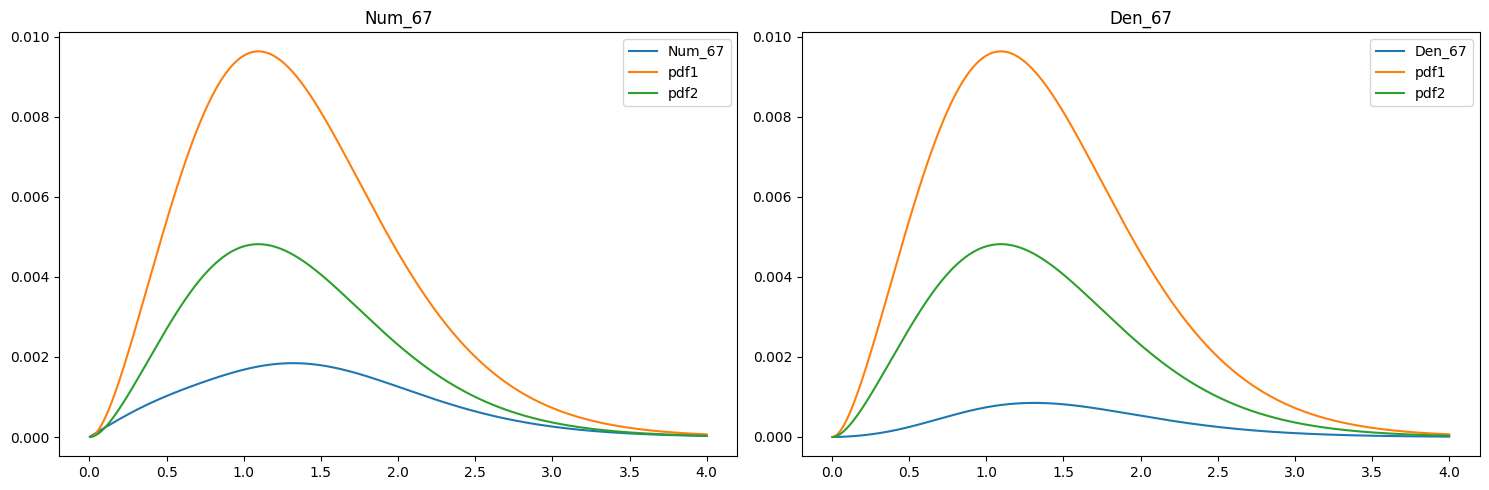

In [333]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_67_2d, Den_67_2d]
titles = ['Num_67', 'Den_67']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [334]:
def Num67(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_67_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den67(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_67_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [335]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_67 = monte_carlo_integration(samples_p1, p1, Num67, Den67)[0]
E_p2_67 = monte_carlo_integration(samples_p2, p2, Num67, Den67)[0]
Den_67_p1 = monte_carlo_integration(samples_p1, p1, Num67, Den67)[2]
Den_67_p2 = monte_carlo_integration(samples_p2, p2, Num67, Den67)[2]

print(f"Estimated E using P1: {E_p1_67}")
print(f"Denominator using P1: {Den_67_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_67}")
print(f"Denominator using P2: {Den_67_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.318243064044457
Denominator using P1: 0.0769522562461106
Number of Samples Collected: 90000
Number of Samples Accepted: 75278
Fraction Acceptances: 0.75278

Estimated E using P2: -2.3135821814701676
Denominator using P2: 0.1909235308865882
Number of Samples Collected: 90000
Number of Samples Accepted: 51817
Fraction Acceptances: 0.51817



In [336]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_67 = u6_p1*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_67 = u6_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_67_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_67)
S_p2_67_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_67)

In [337]:
def S67_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_67_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S67_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_67_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [338]:
S_67_p1 = MCI(samples_p1, p1, S67_p1)
S_67_p2 = MCI(samples_p2, p2, S67_p2)

print(f"Estimated S67 using P1: {S_67_p1}")
print(f"Estimated S67 using P2: {S_67_p2}")

Estimated S67 using P1: 0.07893966754950414
Estimated S67 using P2: -0.07598979758481822


## H_77

In [339]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_77 = (Phi_7 * H_Phi7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_77 = (Phi_7*Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [340]:
Num_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_77, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_77)

In [341]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [342]:
Num_77_2d = Num_77_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_77_2d = Den_77_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-211>:2: RuntimeWarning: invalid value encountered in divide
  return (r1 + r2)*sqrt(-2*r1**2*r2**2*(sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + r1**2 + r2**2)*(-0.5*r1**4*r2**2*(r1 + r2)*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/abs(r1*r2) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) + r1**2 + r2**2) - 0.5*r1**4*r2**2*(r1 + r2)*(cos(phi1 - phi2)/abs(r1*r2) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/abs(r1*r2) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/abs(r1*r2) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2)*sin(theta1

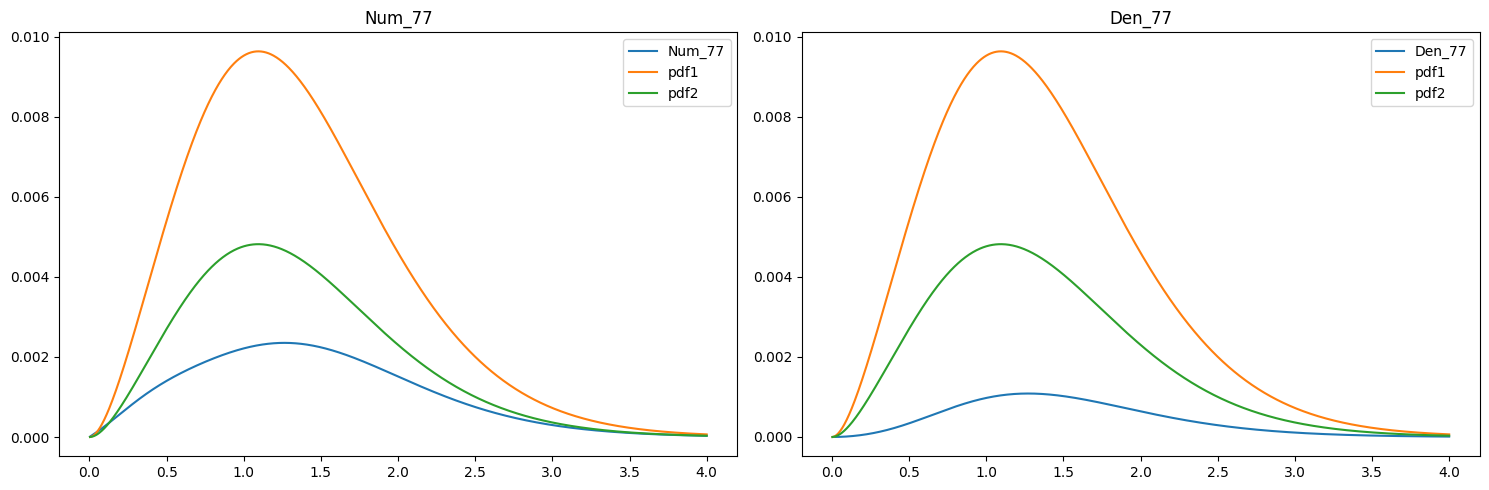

In [343]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_77_2d, Den_77_2d]
titles = ['Num_77', 'Den_77']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [344]:
def Num77(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_77_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den77(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_77_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [345]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.745
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1 = result_p1[0]
num_accept_p1 = result_p1[1]

samples_p2 = result_p2[0]
num_accept_p2 = result_p2[1]

## burn_in period
burn_in = 10000
samples_p1 = samples_p1[burn_in:]
samples_p2 = samples_p2[burn_in:]

E_p1_77 = monte_carlo_integration(samples_p1, p1, Num77, Den77)[0]
E_p2_77 = monte_carlo_integration(samples_p2, p2, Num77, Den77)[0]
Den_77_p1 = monte_carlo_integration(samples_p1, p1, Num77, Den77)[2]
Den_77_p2 = monte_carlo_integration(samples_p2, p2, Num77, Den77)[2]

print(f"Estimated E using P1: {E_p1_77}")
print(f"Denominator using P1: {Den_77_p1}")
print("Number of Samples Collected: %s"%len(samples_p1))
print("Number of Samples Accepted: %s"%(num_accept_p1))
print("Fraction Acceptances: %s"%(num_accept_p1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_77}")
print(f"Denominator using P2: {Den_77_p2}")
print("Number of Samples Collected: %s"%len(samples_p2))
print("Number of Samples Accepted: %s"%(num_accept_p2))
print("Fraction Acceptances: %s"%(num_accept_p2 / num_samples))
print('')

Estimated E using P1: -2.382851179141573
Denominator using P1: 0.09384938050463257
Number of Samples Collected: 90000
Number of Samples Accepted: 75564
Fraction Acceptances: 0.75564

Estimated E using P2: -2.406868246343177
Denominator using P2: 0.23442206233407512
Number of Samples Collected: 90000
Number of Samples Accepted: 52243
Fraction Acceptances: 0.52243



In [346]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_7*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u1_p1*u1_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I1_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [347]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_7*u2_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u2_p1*u2_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I2_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [348]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_7*u3_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u3_p1*u3_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I3_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [349]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_7*u4_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u4_p1*u4_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I4_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [350]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_7*u5_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u5_p1*u5_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I5_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [351]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p1 = Phi_7*u6_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p1 = u6_p1*u6_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p1)
Den_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p1)

def Num_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p1(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p1 = metropolis_sampling(p1, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p1 = samples_p1[burn_in:]

I6_p1 = monte_carlo_integration(samples_p1, p1, Num_p1, Den_p1)[0]

In [352]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u1_p2*u1_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I1_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [353]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u2_p2*u2_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I2_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [354]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u3_p2*u3_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I3_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [355]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u4_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u4_p2*u4_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I4_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [356]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u5_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u5_p2*u5_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I5_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [357]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p2 = Phi_7*u6_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_p2 = u6_p2*u6_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p2)
Den_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_p2)

def Num_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den_p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

samples_p2 = metropolis_sampling(p2, Sampling_func, initial, num_samples, Range_value, std)[0]
samples_p2 = samples_p2[burn_in:]

I6_p2 = monte_carlo_integration(samples_p2, p2, Num_p2, Den_p2)[0]

In [358]:
u7_p1 = Phi_7 - (I1_p1 * u1_p1) - (I2_p1 * u2_p1) - (I3_p1 * u3_p1) - (I4_p1 * u4_p1) - (I5_p1 * u5_p1) - (I6_p1 * u6_p1)
u7_p2 = Phi_7 - (I1_p2 * u1_p2) - (I2_p2 * u2_p2) - (I3_p2 * u3_p2) - (I4_p2 * u4_p2) - (I5_p2 * u5_p2) - (I6_p2 * u6_p2)

In [359]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p1 = u7_p1*u7_p1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm__p2 = u7_p2*u7_p2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Norm_p1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p1)
Norm_p2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p2)

def Norm_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p1_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Norm_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p2_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I1 = MCI(samples_p1, p1, Norm_p1)
I2 = MCI(samples_p2, p2, Norm_p2)

In [360]:
u7_p1 = u7_p1 / np.sqrt(I1)
u7_p2 = u7_p2 / np.sqrt(I2)

In [361]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p1_71 = u7_p1*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_71 = u7_p2*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_72 = u7_p1*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_72 = u7_p2*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_73 = u7_p1*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_73 = u7_p2*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_74 = u7_p1*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_74 = u7_p2*Phi_4 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_75 = u7_p1*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_75 = u7_p2*Phi_5 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_76 = u7_p1*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_76 = u7_p2*Phi_6 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p1_77 = u7_p1*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p2_77 = u7_p2*Phi_7 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p1_71_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_71)
S_p2_71_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_71)
S_p1_72_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_72)
S_p2_72_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_72)
S_p1_73_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_73)
S_p2_73_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_73)
S_p1_74_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_74)
S_p2_74_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_74)
S_p1_75_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_75)
S_p2_75_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_75)
S_p1_76_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_76)
S_p2_76_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_76)
S_p1_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p1_77)
S_p2_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p2_77)

In [362]:
def S71_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_71_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S71_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_71_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S72_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_72_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S72_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_72_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S73_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_73_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S73_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_73_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S74_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_74_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S74_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_74_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S75_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_75_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S75_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_75_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S76_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_76_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S76_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_76_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S77_p1(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p1_77_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S77_p2(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p2_77_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [363]:
S_71_p1 = MCI(samples_p1, p1, S71_p1)
S_71_p2 = MCI(samples_p2, p2, S71_p2)

S_72_p1 = MCI(samples_p1, p1, S72_p1)
S_72_p2 = MCI(samples_p2, p2, S72_p2)

S_73_p1 = MCI(samples_p1, p1, S73_p1)
S_73_p2 = MCI(samples_p2, p2, S73_p2)

S_74_p1 = MCI(samples_p1, p1, S74_p1)
S_74_p2 = MCI(samples_p2, p2, S74_p2)

S_75_p1 = MCI(samples_p1, p1, S75_p1)
S_75_p2 = MCI(samples_p2, p2, S75_p2)

S_76_p1 = MCI(samples_p1, p1, S76_p1)
S_76_p2 = MCI(samples_p2, p2, S76_p2)

S_77_p1 = MCI(samples_p1, p1, S77_p1)
S_77_p2 = MCI(samples_p2, p2, S77_p2)

In [364]:
print(f"Estimated S71 using P1: {S_71_p1}")
print(f"Estimated S71 using P2: {S_71_p2}")

print(f"Estimated S72 using P1: {S_72_p1}")
print(f"Estimated S72 using P2: {S_72_p2}")

print(f"Estimated S73 using P1: {S_73_p1}")
print(f"Estimated S73 using P2: {S_73_p2}")

print(f"Estimated S74 using P1: {S_74_p1}")
print(f"Estimated S74 using P2: {S_74_p2}")

print(f"Estimated S75 using P1: {S_75_p1}")
print(f"Estimated S75 using P2: {S_75_p2}")

print(f"Estimated S76 using P1: {S_76_p1}")
print(f"Estimated S76 using P2: {S_76_p2}")

print(f"Estimated S77 using P1: {S_77_p1}")
print(f"Estimated S77 using P2: {S_77_p2}")

Estimated S71 using P1: -0.0007355954711521237
Estimated S71 using P2: -0.03440675682430319
Estimated S72 using P1: -0.012803952322469237
Estimated S72 using P2: -0.052872885274910346
Estimated S73 using P1: -0.005858746647375677
Estimated S73 using P2: -0.041893942398274445
Estimated S74 using P1: -0.0008478280483516465
Estimated S74 using P2: -0.0430147832986024
Estimated S75 using P1: -0.032162893065075394
Estimated S75 using P2: -0.09516883408604852
Estimated S76 using P1: -0.043393993663425855
Estimated S76 using P2: -0.03965912803629787
Estimated S77 using P1: -0.033736609361613955
Estimated S77 using P2: -0.05915273472267354


## Matrix Diagonalization and Minimum Energy Eigenvalue

In [365]:
H_non_orth_P1 = np.matrix([[E_p1_11, E_p1_12, E_p1_13, E_p1_14, E_p1_15, E_p1_16, E_p1_17],
                           [E_p1_12, E_p1_22, E_p1_23, E_p1_24, E_p1_25, E_p1_26, E_p1_27],
                           [E_p1_13, E_p1_23, E_p1_33, E_p1_34, E_p1_35, E_p1_36, E_p1_37],
                           [E_p1_14, E_p1_24, E_p1_34, E_p1_44, E_p1_45, E_p1_46, E_p1_47],
                           [E_p1_15, E_p1_25, E_p1_35, E_p1_45, E_p1_55, E_p1_56, E_p1_57],
                           [E_p1_16, E_p1_26, E_p1_36, E_p1_46, E_p1_56, E_p1_66, E_p1_67],
                           [E_p1_17, E_p1_27, E_p1_37, E_p1_47, E_p1_57, E_p1_67, E_p1_77]])

H_non_orth_P2 = np.matrix([[E_p2_11, E_p2_12, E_p2_13, E_p2_14, E_p2_15, E_p2_16, E_p2_17],
                           [E_p2_12, E_p2_22, E_p2_23, E_p2_24, E_p2_25, E_p2_26, E_p2_27],
                           [E_p2_13, E_p2_23, E_p2_33, E_p2_34, E_p2_35, E_p2_36, E_p2_37],
                           [E_p2_14, E_p2_24, E_p2_34, E_p2_44, E_p2_45, E_p2_46, E_p2_47],
                           [E_p2_15, E_p2_25, E_p2_35, E_p2_45, E_p2_55, E_p2_56, E_p2_57],
                           [E_p2_16, E_p2_26, E_p2_36, E_p2_46, E_p2_56, E_p2_66, E_p2_67],
                           [E_p2_17, E_p2_27, E_p2_37, E_p2_47, E_p2_57, E_p2_67, E_p2_77]])

In [366]:
S_p1 = np.matrix([[S_11_p1, S_12_p1, S_13_p1, S_14_p1, S_15_p1, S_16_p1, S_17_p1],
                  [S_21_p1, S_22_p1, S_23_p1, S_24_p1, S_25_p1, S_26_p1, S_27_p1],
                  [S_31_p1, S_32_p1, S_33_p1, S_34_p1, S_35_p1, S_36_p1, S_37_p1],
                  [S_41_p1, S_42_p1, S_43_p1, S_44_p1, S_45_p1, S_46_p1, S_47_p1],
                  [S_51_p1, S_52_p1, S_53_p1, S_54_p1, S_55_p1, S_56_p1, S_57_p1],
                  [S_61_p1, S_62_p1, S_63_p1, S_64_p1, S_65_p1, S_66_p1, S_67_p1],
                  [S_71_p1, S_72_p1, S_73_p1, S_74_p1, S_75_p1, S_76_p1, S_77_p1]])

S_p2 = np.matrix([[S_11_p2, S_12_p2, S_13_p2, S_14_p2, S_15_p2, S_16_p2, S_17_p2],
                  [S_21_p2, S_22_p2, S_23_p2, S_24_p2, S_25_p2, S_26_p2, S_27_p2],
                  [S_31_p2, S_32_p2, S_33_p2, S_34_p2, S_35_p2, S_36_p2, S_37_p2],
                  [S_41_p2, S_42_p2, S_43_p2, S_44_p2, S_45_p2, S_46_p2, S_47_p2],
                  [S_51_p2, S_52_p2, S_53_p2, S_54_p2, S_55_p2, S_56_p2, S_57_p2],
                  [S_61_p2, S_62_p2, S_63_p2, S_64_p2, S_65_p2, S_66_p2, S_67_p2],
                  [S_71_p2, S_72_p2, S_73_p2, S_74_p2, S_75_p2, S_76_p2, S_77_p2]])

In [367]:
H_orth_p1 = S_p1 @ H_non_orth_P1 @ S_p1.T
H_orth_p2 = S_p2 @ H_non_orth_P2 @ S_p2.T

In [368]:
eigenvalues_p1, eigenvectors_p1 = np.linalg.eigh(H_orth_p1)
eigenvalues_p2, eigenvectors_p2 = np.linalg.eigh(H_orth_p2)

In [369]:
eigenvalues_p1

array([-5.66654211e+00, -1.84457868e-05, -4.31933241e-08,  4.45791578e-06,
        2.83815155e-05,  3.01571598e-03,  1.46702049e-02])

In [370]:
eigenvalues_p2

array([-1.56721583e+01, -6.03688046e-06, -2.76638145e-06,  9.74067509e-08,
        1.65171871e-04,  9.12738356e-03,  2.77285385e-02])

In [371]:
print(min(eigenvalues_p1))
print(min(eigenvalues_p2))

-5.666542112801785
-15.672158263225986
